# **Cursos de Graduação Brasil**

- **Aluno:** Francisco Willem Romão Moreira
- **Professores:**
  - Dr. Heitor Medeiros Florencio
  - Dr. Daniel Sabino Amorim de Araujo
- **Disciplina:** Ciência de Dados (IMD1151)
- Universidade Federal do Rio Grande do Norte (UFRN)
- Instituto Metrópole Digital (IMD)

Este projeto visa fazer uma análise dos cursos de graduação no Brasil, tais como a distribuição dos cursos por região, perfil por modalidade de ensino, situação dos cursos (em atividade, em extinção ou extinto) e por fim, refinar as analises para os principais cursos de tecnologia.

Os dados utilizados nesse projeto foram extraídos da página: [Dados Abertos MEC](<https://dadosabertos.mec.gov.br/indicadores-sobre-ensino-superior/item/183-cursos-de-graduacao-do-brasil>).

# **Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  import seaborn as sns
import os
import gdown

# **Download do dataset via Google Drive**

In [ ]:
!pip install gdown

In [ ]:
url = 'https://drive.google.com/file/d/11z9j5YM_fFH6UFWusgEBmbQHpPhaUTvi/view?usp=sharing'
output = 'dataset_ies.csv'
gdown.download(url, output, quiet=False, fuzzy=True)
print('Arquivo baixado:', os.path.exists(output))

Downloading...
From (original): https://drive.google.com/uc?id=11z9j5YM_fFH6UFWusgEBmbQHpPhaUTvi
From (redirected): https://drive.google.com/uc?id=11z9j5YM_fFH6UFWusgEBmbQHpPhaUTvi&confirm=t&uuid=4e701c7c-a5bb-4492-a36b-ad67adc98c79
To: /content/dataset_ies.csv
100%|██████████| 237M/237M [00:04<00:00, 47.9MB/s]


Arquivo baixado: True


# **Pré-processamento - Limpeza e Transformação**

## **Exploração do dataset e seleção de features**

In [ ]:
df = pd.read_csv('dataset_ies.csv')

In [ ]:
df.head()

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE


In [ ]:
df.shape

(902676, 18)

In [ ]:
df.columns

Index(['CODIGO_IES', 'NOME_IES', 'CATEGORIA_ADMINISTRATIVA',
       'ORGANIZACAO_ACADEMICA', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU',
       'AREA_OCDE', 'MODALIDADE', 'SITUACAO_CURSO', 'QT_VAGAS_AUTORIZADAS',
       'CARGA_HORARIA', 'CODIGO_AREA_OCDE_CINE', 'AREA_OCDE_CINE',
       'CODIGO_MUNICIPIO', 'MUNICIPIO', 'UF', 'REGIAO'],
      dtype='object')

In [ ]:
df.dtypes

NOME_IES                    object
CATEGORIA_ADMINISTRATIVA    object
ORGANIZACAO_ACADEMICA       object
NOME_CURSO                  object
GRAU                        object
MODALIDADE                  object
SITUACAO_CURSO              object
QT_VAGAS_AUTORIZADAS         int64
CARGA_HORARIA                int64
MUNICIPIO                   object
UF                          object
REGIAO                      object
dtype: object

Os tipos de dados estão adequados para o que sua respectiva coluna representa.

In [ ]:
df.nunique()

CODIGO_IES                   3706
NOME_IES                     3672
CATEGORIA_ADMINISTRATIVA        6
ORGANIZACAO_ACADEMICA           6
CODIGO_CURSO                86239
NOME_CURSO                   2206
GRAU                            5
AREA_OCDE                     408
MODALIDADE                      2
SITUACAO_CURSO                  3
QT_VAGAS_AUTORIZADAS          857
CARGA_HORARIA                3435
CODIGO_AREA_OCDE_CINE         423
AREA_OCDE_CINE                519
CODIGO_MUNICIPIO             3439
MUNICIPIO                    3325
UF                             28
REGIAO                          6
dtype: int64

Note a diferença que existe na quantidade de dados únicos entre a coluna `CODIGO_IES` e a coluna `NOME_IES`, explorando o dataset percebi que a coluna `CODIGO_IES`, algumas vezes mostrava códigos diferentes quando se tratava de uma mesma instituição. Dado essa situação, e também pela natureza do trabalho não vi o porque de utilizar a coluna `CODIGO_IES`.

A mesma situação acontece com as colunas `CODIGO_MUNICIPIO` e `MUNICIPIO`. `CODIGO_CURSO` e `NOME_CURSO`. Indicando possíveis erros no preenchimento do dataset.

In [ ]:
df['AREA_OCDE'].unique()

array(['Agronomia',
       'Formação de professor de língua/literatura vernácula (português)',
       'Formação de professor de geografia', 'Educação física', nan,
       'Análise e Desenvolvimento de Sistemas (Tecnólogo)',
       'Gestão da informação', 'Formação de professor de dança',
       'Ciências contábeis', 'Administração',
       'Formação de professor de artes visuais',
       'Saúde e segurança no trabalho',
       'Formação de professor de língua/literatura estrangeira moderna',
       'Formação de professor de língua/literatura vernácula e língua estrangeira moderna',
       'Engenharia de produção',
       'Formação de professor de educação especial',
       'Sistemas de informação', 'Negócios internacionais',
       'Produção industrial', 'Engenharia química',
       'Administração hospitalar', 'Biomedicina',
       'Extração de petróleo e gás', 'Secretariado', 'Teologia',
       'Gestão de Turismo', 'Saúde (programas ou cursos gerais)',
       'Uso da internet', 'Forma

In [ ]:
df['AREA_OCDE_CINE'].unique()

array(['Agronomia',
       'Formação de professor de língua/literatura vernácula (português)',
       'Formação de professor de geografia', 'Educação física',
       'Serviços penais', 'Gestão comercial',
       'Análise e Desenvolvimento de Sistemas (Tecnólogo)',
       'Gestão da informação', 'Formação de professor de dança',
       'Agrocomputação', 'Ciências contábeis', 'Administração',
       'Formação de professor de artes visuais',
       'Saúde e segurança no trabalho', 'Jogos digitais',
       'Serviços jurídicos e cartoriais',
       'Formação de professor de língua/literatura estrangeira moderna',
       'Formação de professor de língua/literatura vernácula e língua estrangeira moderna',
       'Gestão de negócios', 'Engenharia de produção',
       'Formação de professor de educação especial',
       'Sistemas de informação', 'Negócios internacionais',
       'Produção industrial', 'Engenharia química', 'Logística',
       'Administração hospitalar', 'Design gráfico', 'Biome

A coluna `AREA_OCDE` e `AREA_OCDE_CINE` consistia em vários dados muito diversos e que não representava com abrangência a área no sentido geral, e sim em sentido mais específico. Exemplo: ao invés da área ser educação, eles colocam Pedagogia, assim como, Educação Física ao invés de ser da área saúde, é a própria educação física. Então para fins de avaliação não me ajudará a responder as perguntas de minhas análises futuras.

Assim, posso fazer a remoção das seguintes colunas:

In [ ]:
df = df.drop(columns=['CODIGO_IES',
                      'CODIGO_CURSO',
                      'AREA_OCDE',
                      'CODIGO_AREA_OCDE_CINE',
                      'AREA_OCDE_CINE',
                      'CODIGO_MUNICIPIO'])

Com isso tenho minha seleção de features, ou seja, as colunas/variáveis com quem eu quero trabalhar, são.

In [ ]:
df.columns

Index(['NOME_IES', 'CATEGORIA_ADMINISTRATIVA', 'ORGANIZACAO_ACADEMICA',
       'NOME_CURSO', 'GRAU', 'MODALIDADE', 'SITUACAO_CURSO',
       'QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA', 'MUNICIPIO', 'UF', 'REGIAO'],
      dtype='object')

In [ ]:
df.shape

(902676, 12)

Saindo de 18 colunas para 12, com uma redução de 6 colunas.

A seguir, veremos do que se trata algumas coluna no que tange a seus valores únicos.

In [ ]:
df['NOME_CURSO'].unique()

array(['ENGENHARIA AGRONÔMICA', 'LETRAS', 'GEOGRAFIA', ...,
       'GESTÃO DO SOCIAL',
       'INTERDISCIPLINAR EM CULTURA, LINGUAGENS E TECNOLOGIAS APLICADAS',
       'FíSICA COM HABILITAçãO EM PESQUISA BáSICA'], dtype=object)

In [ ]:
df['CATEGORIA_ADMINISTRATIVA'].unique()

array(['Privada com fins lucrativos', 'Privada sem fins lucrativos',
       'Pública Municipal', 'Pública Federal', 'Pública Estadual',
       'Especial'], dtype=object)

In [ ]:
df['ORGANIZACAO_ACADEMICA'].unique()

array(['Centro Universitário', 'Universidade', 'Faculdade',
       'Instituto Federal de Educação, Ciência e Tecnologia',
       'Centro Federal de Educação Tecnológica',
       'Instituição Especialmente Credenciada para oferta de cursos lato sensu'],
      dtype=object)

In [ ]:
df['GRAU'].unique()

array(['Bacharelado', 'Licenciatura', 'Tecnológico',
       'Área Básica de Ingresso (ABI)', 'Sequencial'], dtype=object)

In [ ]:
df['MODALIDADE'].unique()

array(['Educação a Distância', 'Educação Presencial'], dtype=object)

In [ ]:
df['SITUACAO_CURSO'].unique()

array(['Em atividade', 'Em extinção', 'Extinto'], dtype=object)

In [ ]:
df['UF'].unique()

array(['SP', 'PB', 'SE', 'PR', 'PE', 'RN', 'SC', 'RJ', 'RS', 'GO', 'BA',
       'MG', 'MT', 'CE', 'PA', 'RO', 'TO', 'AM', 'ES', 'AC', 'MA', 'AL',
       'DF', 'ZZ', 'MS', 'PI', 'RR', 'AP'], dtype=object)

Sabendo que não existe estado do Brasil com as siglas `ZZ`, então vamos analisar de qual munícipio e região se trata.

In [ ]:
df[df['UF'] == 'ZZ'][['UF', 'REGIAO', 'MUNICIPIO']].head()

,UF,REGIAO,MUNICIPIO
182,ZZ,IGNORADO/EXTERIOR,Ignorado ou exterior
528,ZZ,IGNORADO/EXTERIOR,Ignorado ou exterior
1585,ZZ,IGNORADO/EXTERIOR,Ignorado ou exterior
2113,ZZ,IGNORADO/EXTERIOR,Ignorado ou exterior
2166,ZZ,IGNORADO/EXTERIOR,Ignorado ou exterior


Quantos cursos existem nessa categoria?

In [ ]:
df[df['UF']=='ZZ'].nunique()

NOME_IES                     25
CATEGORIA_ADMINISTRATIVA      2
ORGANIZACAO_ACADEMICA         3
NOME_CURSO                  191
GRAU                          3
MODALIDADE                    1
SITUACAO_CURSO                3
QT_VAGAS_AUTORIZADAS         80
CARGA_HORARIA               170
MUNICIPIO                     1
UF                            1
REGIAO                        1
dtype: int64

Existem pouco menos de 200 cursos na categoria ZZ.

In [ ]:
df['REGIAO'].unique()

array(['SUDESTE', 'NORDESTE', 'SUL', 'CENTRO-OESTE', 'NORTE',
       'IGNORADO/EXTERIOR'], dtype=object)

In [ ]:
df[df['REGIAO']=='IGNORADO/EXTERIOR'].nunique()

NOME_IES                     25
CATEGORIA_ADMINISTRATIVA      2
ORGANIZACAO_ACADEMICA         3
NOME_CURSO                  191
GRAU                          3
MODALIDADE                    1
SITUACAO_CURSO                3
QT_VAGAS_AUTORIZADAS         80
CARGA_HORARIA               170
MUNICIPIO                     1
UF                            1
REGIAO                        1
dtype: int64

Dado que a categoria ZZ da coluna `UF` e a categoria `IGNORADO/EXTERIOR` da coluna `REGIAO` tem a mesma quantidade de cursos (191), então ambas correspondem ao mesmo perfil. E como eu quero analisar apenas o Brasil resolvi fazer um remoção:

In [ ]:
df = df.drop(df[subs(df['UF'] == 'ZZ') & (df['REGIAO'] == 'IGNORADO/EXTERIOR')].index)

## **Tratamento de valores ausentes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902068 entries, 0 to 902675
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   NOME_IES                  902068 non-null  object
 1   CATEGORIA_ADMINISTRATIVA  902068 non-null  object
 2   ORGANIZACAO_ACADEMICA     902068 non-null  object
 3   NOME_CURSO                902068 non-null  object
 4   GRAU                      902068 non-null  object
 5   MODALIDADE                902068 non-null  object
 6   SITUACAO_CURSO            902068 non-null  object
 7   QT_VAGAS_AUTORIZADAS      902068 non-null  int64 
 8   CARGA_HORARIA             902068 non-null  int64 
 9   MUNICIPIO                 902068 non-null  object
 10  UF                        902068 non-null  object
 11  REGIAO                    902068 non-null  object
dtypes: int64(2), object(10)
memory usage: 89.5+ MB


In [ ]:
df.isnull().sum()

NOME_IES                    0
CATEGORIA_ADMINISTRATIVA    0
ORGANIZACAO_ACADEMICA       0
NOME_CURSO                  0
GRAU                        0
MODALIDADE                  0
SITUACAO_CURSO              0
QT_VAGAS_AUTORIZADAS        0
CARGA_HORARIA               0
MUNICIPIO                   0
UF                          0
REGIAO                      0
dtype: int64

Os comandos acima mostram que não existe valores nulos ou ausentes no dataframe.

## **Outliers e ruídos**

**ATENÇÃO:** a limpeza que será feita servirá apenas para análises futuras dos cursos de TI a despeito da quantidade de vagas e da carga horária.

**Refinamentos**

In [ ]:
df_ea = df[df['SITUACAO_CURSO'] == 'Em atividade'] # df_ea = dataframe apenas com cursos em atividades

Com base [nessa fonte](https://www.insper.edu.br/noticias/cursos-de-graduacao-na-area-de-tecnologia/), filtro os cursos mais procurados e com maior relevância no Brasil.

In [ ]:
cursos_ti = [
    'TECNOLOGIA DA INFORMAÇÃO',
    'CIÊNCIA DA COMPUTAÇÃO',
    'CIÊNCIAS DA COMPUTAÇÃO',
    'ENGENHARIA DA COMPUTAÇÃO',
    'ENGENHARIA DE COMPUTAÇÃO',
    'ENGENHARIA DE SOFTWARE',
    'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS',
    'SISTEMAS DE INFORMAÇÃO',
    'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO',
    'ENGENHARIA DE TELECOMUNICAÇÕES',
    'REDES DE COMPUTADORES',
    'ENGENHARIA MECATRÔNICA',
    'ENGENHARIA DE CONTROLE E AUTOMAÇÃO',
    'SISTEMAS PARA INTERNET',
    'BANCO DE DADOS',
    'JOGOS DIGITAIS'
]

dfti = df_ea[df_ea['NOME_CURSO'].isin(cursos_ti)] # dfti é o dataframe com os cursos de TI Em Atividade listados acima.

Analisando com unique todos os cursos, percebi que alguns cursos como o de Ciência da Computação e Engenharia da Computação divergia no nome, então apliquei um replace para todos esses casos estabelecendo o padrão abaixo.

In [ ]:
dfti['NOME_CURSO'] = dfti['NOME_CURSO'].replace('CIÊNCIAS DA COMPUTAÇÃO', 'CIÊNCIA DA COMPUTAÇÃO')
dfti['NOME_CURSO'] = dfti['NOME_CURSO'].replace('CIêNCIAS DE COMPUTAçãO', 'CIÊNCIA DA COMPUTAÇÃO')

dfti['NOME_CURSO'] = dfti['NOME_CURSO'].replace('ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA DE COMPUTAÇÃO')

dfti['NOME_CURSO'] = dfti['NOME_CURSO'].replace('GESTÃO EM TECNOLOGIA DA INFORMAÇÃO', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO')
dfti['NOME_CURSO'] = dfti['NOME_CURSO'].replace('GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO')

<ipython-input-164-c3e7409d60c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfti['NOME_CURSO'] = dfti['NOME_CURSO'].replace('CIÊNCIAS DA COMPUTAÇÃO', 'CIÊNCIA DA COMPUTAÇÃO')
<ipython-input-164-c3e7409d60c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfti['NOME_CURSO'] = dfti['NOME_CURSO'].replace('CIêNCIAS DE COMPUTAçãO', 'CIÊNCIA DA COMPUTAÇÃO')
<ipython-input-164-c3e7409d60c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Primeiro vamos analisar possíveis ruídos e outliers na coluna `QT_VAGAS_AUTORIZADAS`.

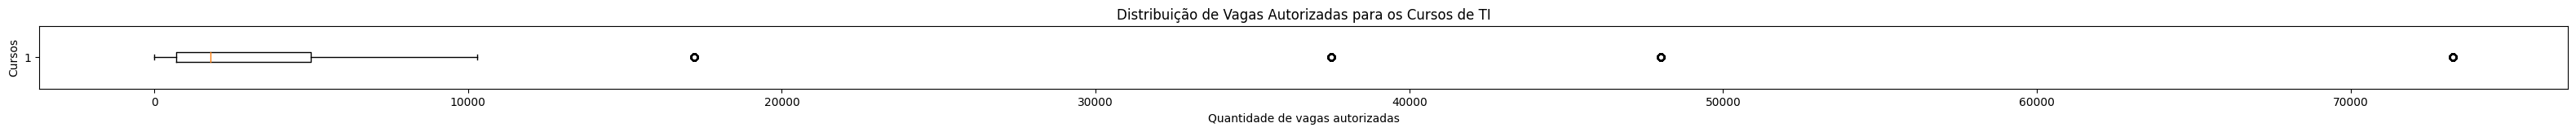

In [ ]:
plt.figure(figsize=(40,1))
plt.boxplot(dfti['QT_VAGAS_AUTORIZADAS'], vert=False)
plt.xlabel('Quantidade de vagas autorizadas')
plt.ylabel('Cursos')
plt.title('Distribuição de Vagas Autorizadas para os Cursos de TI')

plt.show()

In [ ]:
dfti[['QT_VAGAS_AUTORIZADAS', 'NOME_CURSO', 'NOME_IES', 'MODALIDADE', 'MUNICIPIO']].sort_values(by=['QT_VAGAS_AUTORIZADAS'], ascending=False).head(10)

,QT_VAGAS_AUTORIZADAS,NOME_CURSO,NOME_IES,MODALIDADE,MUNICIPIO
489344,73260,REDES DE COMPUTADORES,UNIVERSIDADE PAULISTA,Educação a Distância,Itapetininga
801603,73260,REDES DE COMPUTADORES,UNIVERSIDADE PAULISTA,Educação a Distância,Niterói
81190,73260,GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,UNIVERSIDADE PAULISTA,Educação a Distância,Tailândia
364854,73260,REDES DE COMPUTADORES,UNIVERSIDADE PAULISTA,Educação a Distância,Guarantã do Norte
550990,73260,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE PAULISTA,Educação a Distância,Cruzeiro do Sul
364790,73260,REDES DE COMPUTADORES,UNIVERSIDADE PAULISTA,Educação a Distância,Ibaté
458034,73260,GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,UNIVERSIDADE PAULISTA,Educação a Distância,Manicoré
803113,73260,REDES DE COMPUTADORES,UNIVERSIDADE PAULISTA,Educação a Distância,Serra Negra
81734,73260,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE PAULISTA,Educação a Distância,Sumaré
81870,73260,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE PAULISTA,Educação a Distância,Londrina


In [ ]:
dfti[['QT_VAGAS_AUTORIZADAS', 'NOME_CURSO', 'NOME_IES', 'MODALIDADE', 'MUNICIPIO']].sort_values(by=['QT_VAGAS_AUTORIZADAS'], ascending=True).head(10)

,QT_VAGAS_AUTORIZADAS,NOME_CURSO,NOME_IES,MODALIDADE,MUNICIPIO
896478,0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,Universidade do Estado de Mato Grosso Carlos A...,Educação Presencial,Nova Mutum
508215,0,SISTEMAS DE INFORMAÇÃO,UNIVERSIDADE DE SANTA CRUZ DO SUL,Educação Presencial,Sobradinho
440217,0,ENGENHARIA DE COMPUTAÇÃO,UNIVERSIDADE DO ESTADO DO AMAZONAS,Educação Presencial,Manaus
127965,0,SISTEMAS DE INFORMAÇÃO,UNIVERSIDADE DE SANTA CRUZ DO SUL,Educação Presencial,Venâncio Aires
213479,0,REDES DE COMPUTADORES,Fatec Cruzeiro - Prof. Waldomiro May,Educação Presencial,Cruzeiro
5134,0,CIÊNCIA DA COMPUTAÇÃO,UNIVERSIDADE ESTADUAL DO CEARÁ,Educação Presencial,Iguatu
611222,7,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE DO ESTADO DO AMAZONAS,Educação Presencial,Presidente Figueiredo
509922,10,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,Instituto Universitário Una de Catalão,Educação Presencial,Catalão
895604,20,ENGENHARIA DE TELECOMUNICAÇÕES,UNIVERSIDADE LA SALLE,Educação Presencial,Canoas
841735,20,ENGENHARIA DE COMPUTAÇÃO,UNIVERSIDADE ESTADUAL DO RIO GRANDE DO SUL,Educação Presencial,Guaíba


Pesquisando sobre a distribuição da quantidade de vagas em cursos no Brasil, não achei nenhuma informação.

Existem muitos outliers conforme o gráfico de boxplot, com cursos individuais com mais de 10.000 vagas e até mesmo cursos com 73.000 e 0  vagas! Apesar de serem cursos EaD, não posso confirmar se isso é possível.

De qualquer forma vamos fazer o tratamento desses posíveis outliers/ruídos.

In [ ]:
dfti_limpo_qtv = dfti[
    (dfti['QT_VAGAS_AUTORIZADAS'] > dfti['QT_VAGAS_AUTORIZADAS'].quantile(0.001)) &
    (dfti['QT_VAGAS_AUTORIZADAS'] < dfti['QT_VAGAS_AUTORIZADAS'].quantile(0.600))]

# dfti_limpo_qtv = dataframe ti em atividade limpo para quantidade de vagas

In [ ]:
dfti_limpo_qtv['QT_VAGAS_AUTORIZADAS'] = np.where(
                                  dfti_limpo_qtv['QT_VAGAS_AUTORIZADAS'] >= dfti_limpo_qtv['QT_VAGAS_AUTORIZADAS'].quantile(0.600),
                                  dfti_limpo_qtv[(dfti_limpo_qtv['QT_VAGAS_AUTORIZADAS'] > dfti_limpo_qtv['QT_VAGAS_AUTORIZADAS'].quantile(0.001)) & (dfti_limpo_qtv['QT_VAGAS_AUTORIZADAS'] < dfti_limpo_qtv['QT_VAGAS_AUTORIZADAS'].quantile(0.600))]['QT_VAGAS_AUTORIZADAS'].mean(),
                                  dfti_limpo_qtv['QT_VAGAS_AUTORIZADAS'])

<ipython-input-169-aa3cf252bac5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfti_limpo_qtv['QT_VAGAS_AUTORIZADAS'] = np.where(


In [ ]:
dfti_limpo_qtv[['QT_VAGAS_AUTORIZADAS', 'NOME_CURSO', 'NOME_IES', 'MODALIDADE', 'MUNICIPIO']].sort_values(by=['QT_VAGAS_AUTORIZADAS'], ascending=False).head()

,QT_VAGAS_AUTORIZADAS,NOME_CURSO,NOME_IES,MODALIDADE,MUNICIPIO
740049,990.0,SISTEMAS DE INFORMAÇÃO,UNIVERSIDADE DE TAUBATÉ,Educação a Distância,São José dos Campos
265250,990.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE DE TAUBATÉ,Educação a Distância,Recife
252289,990.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE DE TAUBATÉ,Educação a Distância,Paraisópolis
104473,990.0,SISTEMAS DE INFORMAÇÃO,UNIVERSIDADE DE TAUBATÉ,Educação a Distância,Piquete
483939,990.0,SISTEMAS DE INFORMAÇÃO,UNIVERSIDADE DE TAUBATÉ,Educação a Distância,São Bento do Sapucaí


In [ ]:
dfti_limpo_qtv[['QT_VAGAS_AUTORIZADAS', 'NOME_CURSO', 'NOME_IES', 'MODALIDADE', 'MUNICIPIO']].sort_values(by=['QT_VAGAS_AUTORIZADAS'], ascending=True).head()

,QT_VAGAS_AUTORIZADAS,NOME_CURSO,NOME_IES,MODALIDADE,MUNICIPIO
320254,32.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",Educação Presencial,Venâncio Aires
413964,32.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE DO ESTADO DO AMAZONAS,Educação Presencial,Maués
732415,32.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE DO ESTADO DO AMAZONAS,Educação Presencial,Boca do Acre
145728,32.0,SISTEMAS DE INFORMAÇÃO,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",Educação Presencial,Colatina
412958,32.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE DO ESTADO DO AMAZONAS,Educação Presencial,Humaitá


Agora vamos analisar possíveis ruídos e outliers em `CARGA_HORARIA`.

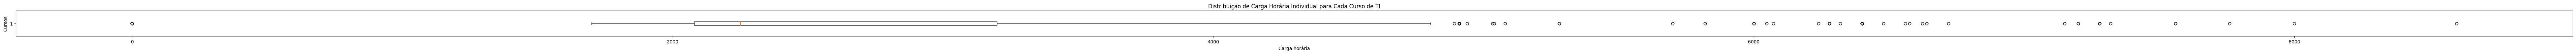

In [ ]:
plt.figure(figsize=(100,1))
plt.boxplot(dfti['CARGA_HORARIA'], vert=False)
plt.xlabel('Carga horária')
plt.ylabel('Cursos')
plt.title('Distribuição de Carga Horária Individual para Cada Curso de TI')

plt.show()

In [ ]:
dfti[['CARGA_HORARIA', 'NOME_CURSO', 'NOME_IES', 'MODALIDADE', 'MUNICIPIO']].sort_values(by=['CARGA_HORARIA'], ascending=False).head()

,CARGA_HORARIA,NOME_CURSO,NOME_IES,MODALIDADE,MUNICIPIO
311124,8600,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,FACULDADE DE TECNOLOGIA PENTÁGONO,Educação Presencial,Santo André
517409,8000,ENGENHARIA DE COMPUTAÇÃO,CENTRO UNIVERSITÁRIO MAURÍCIO DE NASSAU DE BAR...,Educação Presencial,Barreiras
677004,7760,CIÊNCIA DA COMPUTAÇÃO,Centro Universitário Vértice,Educação Presencial,Matipó
62208,7560,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,CENTRO UNIVERSITÁRIO RITTER DOS REIS,Educação Presencial,Canoas
848008,7560,ENGENHARIA DE COMPUTAÇÃO,CENTRO UNIVERSITÁRIO RITTER DOS REIS,Educação Presencial,Porto Alegre


Nos sites das respectivas faculdades acima não achei a carga horária.

In [ ]:
dfti[['CARGA_HORARIA', 'NOME_CURSO', 'NOME_IES', 'MODALIDADE', 'MUNICIPIO']].sort_values(by=['CARGA_HORARIA'], ascending=True).head()

,CARGA_HORARIA,NOME_CURSO,NOME_IES,MODALIDADE,MUNICIPIO
453746,0,SISTEMAS PARA INTERNET,Faculdade de Tecnologia Senac Curitiba Portão,Educação Presencial,Curitiba
58041,0,BANCO DE DADOS,Faculdade de Tecnologia Senac Curitiba Portão,Educação Presencial,Curitiba
5134,0,CIÊNCIA DA COMPUTAÇÃO,UNIVERSIDADE ESTADUAL DO CEARÁ,Educação Presencial,Iguatu
48389,0,REDES DE COMPUTADORES,Faculdade de Tecnologia Senac Curitiba Portão,Educação Presencial,Curitiba
262468,1700,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,FACULDADE VISCONDE DE CAIRÚ,Educação a Distância,Salvador


Existem ruídos nesses dados, conforme o site [Unopar](https://blog.unopar.com.br/carga-horaria-faculdade/) a carga horária de uma faculdade, em geral, tem duração mínima exigida pelo Ministério da Educação de 2.400 horas para bacharelados, para tecnólogos entre 1.600 a 2.000 horas, enquanto graduações mais longas como Medicina e Odontologia, podem chegar a 7.200 horas.

Levando em conta que os cursos mais longos de TI são as Engenharias, e elas tem em média 3800 horas, então vamos estabelecer esse padrão.

In [ ]:
dfti_limpo_ch = dfti[
    (dfti['CARGA_HORARIA'] > dfti['CARGA_HORARIA'].quantile(0.001)) &
    (dfti['CARGA_HORARIA'] < dfti['CARGA_HORARIA'].quantile(0.985))]

# dfti_limpo_ch = dataframe ti em atividade limpo para carga horária

In [ ]:
dfti_limpo_ch['CARGA_HORARIA'] = np.where(
                                  dfti_limpo_ch['CARGA_HORARIA'] >= dfti_limpo_ch['CARGA_HORARIA'].quantile(0.985),
                                  dfti_limpo_ch[(dfti_limpo_ch['CARGA_HORARIA'] > dfti_limpo_ch['CARGA_HORARIA'].quantile(0.001))
                                  & (dfti_limpo_ch['CARGA_HORARIA'] < dfti_limpo_ch['CARGA_HORARIA'].quantile(0.985))]['CARGA_HORARIA'].mean(),
                                  dfti_limpo_ch['CARGA_HORARIA'])

<ipython-input-176-bba5796a2625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfti_limpo_ch['CARGA_HORARIA'] = np.where(


In [ ]:
dfti_limpo_ch[['CARGA_HORARIA', 'NOME_CURSO', 'NOME_IES', 'MODALIDADE', 'MUNICIPIO']].sort_values(by=['CARGA_HORARIA'], ascending=False).head()

,CARGA_HORARIA,NOME_CURSO,NOME_IES,MODALIDADE,MUNICIPIO
664823,3894.0,ENGENHARIA DE COMPUTAÇÃO,UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL,Educação Presencial,Campo Grande
895535,3885.0,ENGENHARIA DE COMPUTAÇÃO,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,Educação Presencial,Natal
174548,3885.0,ENGENHARIA DE TELECOMUNICAÇÕES,UNIVERSIDADE FEDERAL DE SANTA MARIA,Educação Presencial,Santa Maria
849511,3885.0,ENGENHARIA DE COMPUTAÇÃO,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Educação Presencial,Rio de Janeiro
197260,3884.0,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",Educação Presencial,Itumbiara


In [ ]:
dfti_limpo_ch[['CARGA_HORARIA', 'NOME_CURSO', 'NOME_IES', 'MODALIDADE', 'MUNICIPIO']].sort_values(by=['CARGA_HORARIA'], ascending=True).head()

,CARGA_HORARIA,NOME_CURSO,NOME_IES,MODALIDADE,MUNICIPIO
233590,2001.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE PRESBITERIANA MACKENZIE,Educação a Distância,Bauru
338841,2001.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE PRESBITERIANA MACKENZIE,Educação a Distância,Ribeirão Preto
86236,2001.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE PRESBITERIANA MACKENZIE,Educação a Distância,São Luís
573130,2001.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE PRESBITERIANA MACKENZIE,Educação a Distância,São Paulo
311331,2001.0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,UNIVERSIDADE PRESBITERIANA MACKENZIE,Educação a Distância,Aracaju


## **Transformação**

Sobre técnicas de transformação em si como discretização, binarização, codificação, normalização e etc... até o momento não vi como necessário. A depender do algoritmo de Machine Learning que irei aplicar no futuro, é muito provável que farei uso de alguma técnica de transformação.

# **Análises**

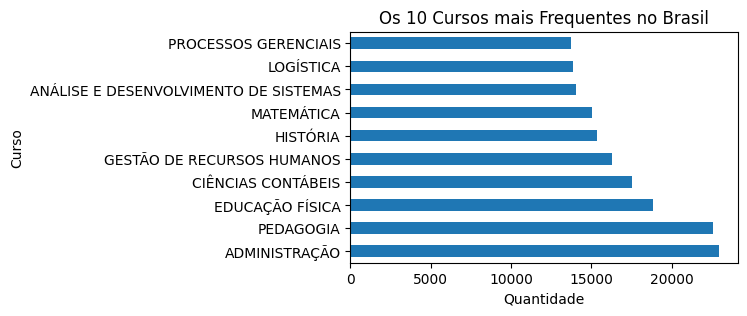

In [ ]:
df['NOME_CURSO'].value_counts().sort_values(ascending=False).head(10).plot.barh(figsize=(5, 3))
plt.title('Os 10 Cursos mais Frequentes no Brasil')
plt.xlabel('Quantidade')
plt.ylabel('Curso')
plt.show()

Levar em conta que o dado anterior inclui cursos em atividade e extintos.

In [ ]:
df_ea.shape # df_ea = dataframe apenas com cursos em atividade

(852328, 12)

O dataframe **de_ea** possui 852.328 linhas de cursos em atividade.

In [ ]:
df.shape

(902068, 12)

Para o dataframe geral temos 902.068 linhas.

Com isso, o **df_ea** tem uma redução de 49.740 linhas.

Vamos também criar um dataframe apenas com os cursos do estado do Rio Grande do Norte.

In [ ]:
df_earn = df_ea[df_ea['UF'] == 'RN'] # df_earn = cursos do RN em atividade

## **Distribuição dos cursos por região**

Esta seção pretende:

- Explorar a distribuição geográfica dos cursos de graduação no Brasil por estado.
- Identificar quais estados possuem mais cursos e quais têm menos.
- Analisar se existe alguma correlação entre a disponibilidade de cursos e indicadores socioeconômicos das regiões.

Primeiro vamos analisar a quantidade de cursos em atividade por região.

In [ ]:
df_ea['REGIAO'].value_counts()

REGIAO
SUDESTE         324727
NORDESTE        194187
SUL             178700
NORTE            79383
CENTRO-OESTE     75331
Name: count, dtype: int64

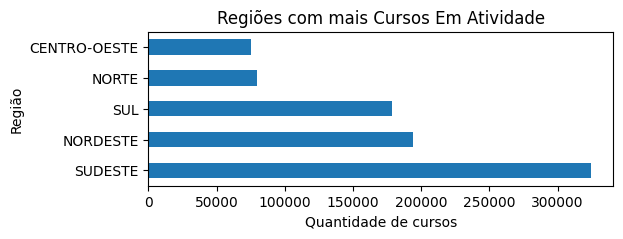

In [ ]:
df_ea['REGIAO'].value_counts().plot.barh(figsize=(6, 2))
plt.title('Regiões com mais Cursos Em Atividade')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Região')
plt.show()

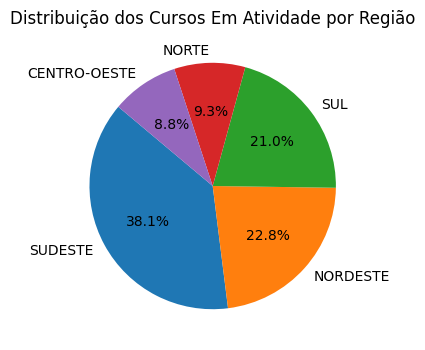

In [ ]:
plt.figure(figsize=(4,4))

qt_regiao = df_ea['REGIAO'].value_counts()

plt.pie(qt_regiao, labels=qt_regiao.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Cursos Em Atividade por Região')
plt.show()

In [ ]:
dados_pb = {
  'REGIAO': ['NORTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'SUL'],
  'POPULACAO': [17349619, 54644582, 16287809, 84847187, 29933315]
}

df_pb = pd.DataFrame(dados_pb) # df_pb = DataFrame População Brasil

Os dados são do IBGE e foram retirados do site: [Mundo Educação](https://mundoeducacao.uol.com.br/geografia/populacao-brasileira.htm) e fazem parte do senso demográfico de 2022.

In [ ]:
df_pb.head()

,REGIAO,POPULACAO
0,NORTE,17349619
1,NORDESTE,54644582
2,CENTRO-OESTE,16287809
3,SUDESTE,84847187
4,SUL,29933315


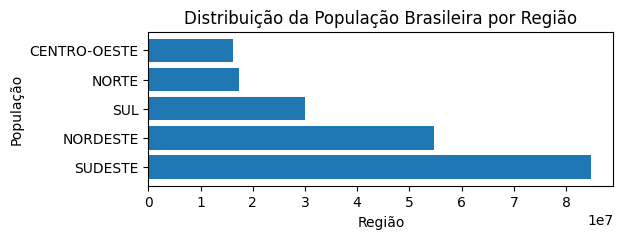

In [ ]:
df_pbsorted = df_pb.sort_values(by='POPULACAO', ascending=False)

plt.figure(figsize=(6,2))
plt.barh(df_pbsorted['REGIAO'], df_pbsorted['POPULACAO'])

plt.xlabel('Região')
plt.ylabel('População')
plt.title('Distribuição da População Brasileira por Região')
plt.show()

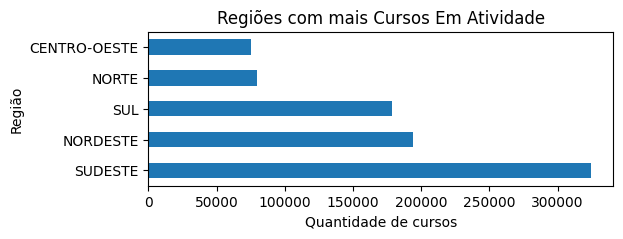

In [ ]:
df_ea['REGIAO'].value_counts().plot.barh(figsize=(6, 2))
plt.title('Regiões com mais Cursos Em Atividade')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Região')
plt.show()

Percebemos que as regiões que possuem mais habitantes são as que tem mais cursos em atividade.

Por outro lado, não existe uma correlação entre o PIB das regiões e quantidade de cursos.

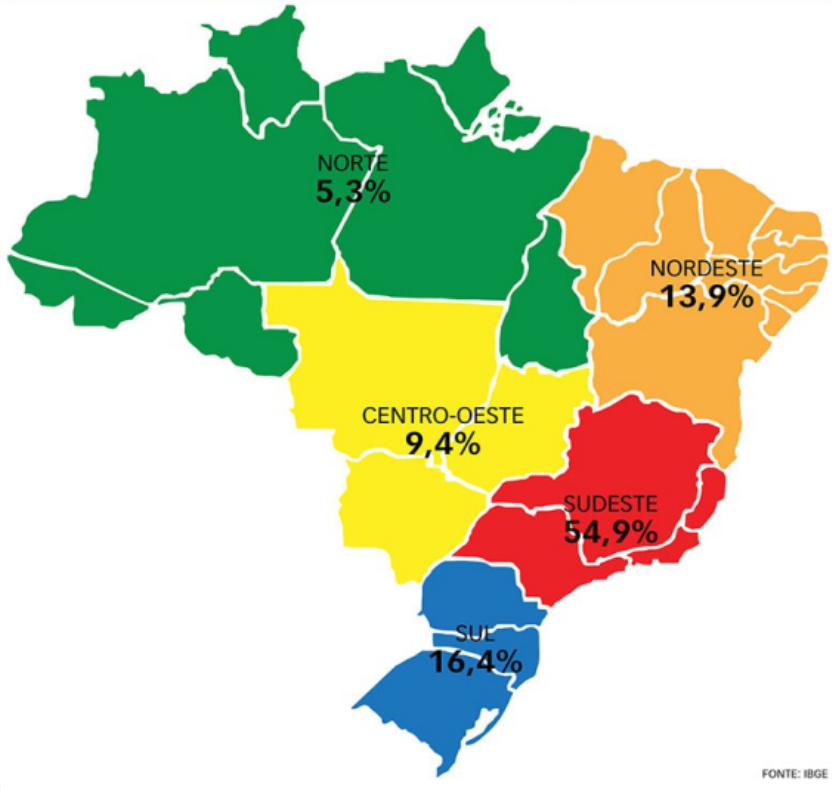

A seguir vamos analisar a quantidade de cursos por estado.

In [ ]:
df_ea['UF'].value_counts()

UF
SP    156047
MG    102741
PR     70751
RS     63417
BA     59081
RJ     44821
SC     44532
PA     38175
CE     34108
GO     31016
PE     26410
MA     25740
MT     23322
ES     21118
MS     17202
AM     11635
PB     11593
RO     10745
PI     10373
RN      9499
AL      9001
SE      8382
TO      7991
AC      5123
DF      3791
AP      2914
RR      2800
Name: count, dtype: int64

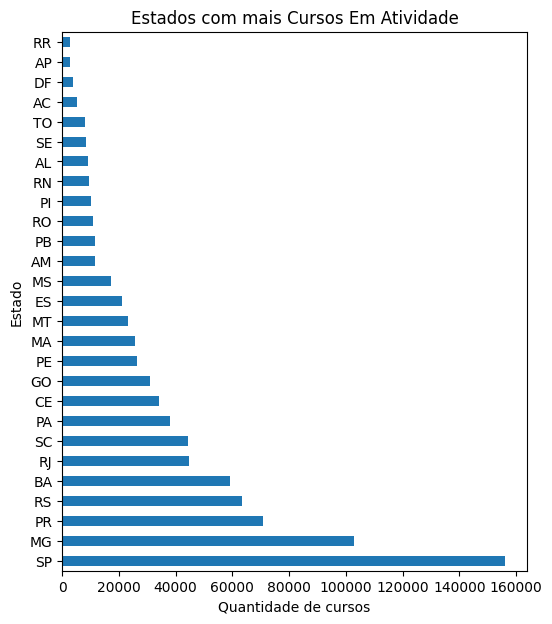

In [ ]:
df_ea['UF'].value_counts().plot.barh(figsize=(6, 7))
plt.title('Estados com mais Cursos Em Atividade')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Estado')
plt.show()

Agora uma análise da quantidade de cursos nos municípios do Rio Grande do Norte.

In [ ]:
df_earn['MUNICIPIO'].value_counts().head(15)

MUNICIPIO
Natal                      1863
Mossoró                    1280
Parnamirim                  817
Currais Novos               542
Caicó                       528
Ceará-Mirim                 485
Apodi                       456
Açu                         411
Pau dos Ferros              367
Macaíba                     314
João Câmara                 225
Santa Cruz                  184
Macau                       172
São Gonçalo do Amarante     165
Canguaretama                142
Name: count, dtype: int64

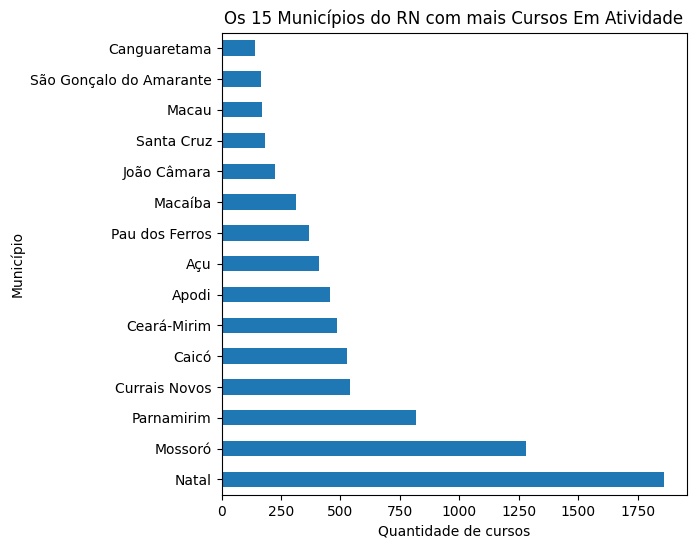

In [ ]:
df_earn['MUNICIPIO'].value_counts().head(15).plot.barh(figsize=(6, 6))
plt.title('Os 15 Municípios do RN com mais Cursos Em Atividade')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Município')
plt.show()

## **Perfil dos cursos por modalidade de ensino**

Esta seção pretende:

- Comparar a quantidade e a distribuição dos cursos de graduação (Em Atividade), Presenciais e  EaD.
- Analisar se existe diferenças no  grau dos cursos e na carga horária de acordo com a modalidade.

In [ ]:
df_ea['MODALIDADE'].value_counts()

MODALIDADE
Educação a Distância    808360
Educação Presencial      43968
Name: count, dtype: int64

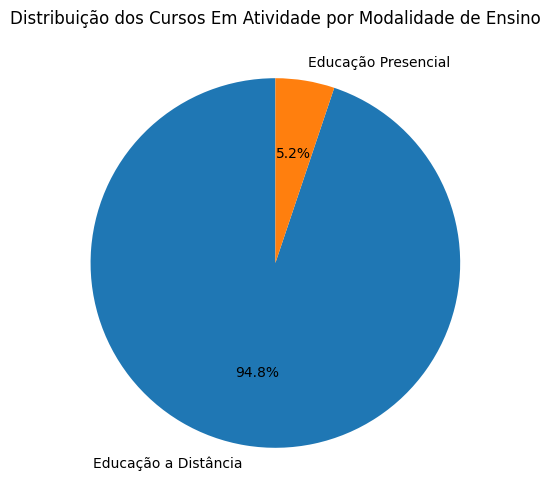

In [ ]:
value_counts = df_ea['MODALIDADE'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Cursos Em Atividade por Modalidade de Ensino')
plt.show()

Como mostrado acima, exitem mais cursos EaD do que presenciais.

In [ ]:
df_ea.groupby('REGIAO')['MODALIDADE'].value_counts().sort_values(ascending=False)

REGIAO        MODALIDADE          
SUDESTE       Educação a Distância    305673
NORDESTE      Educação a Distância    184587
SUL           Educação a Distância    171159
NORTE         Educação a Distância     75737
CENTRO-OESTE  Educação a Distância     71204
SUDESTE       Educação Presencial      19054
NORDESTE      Educação Presencial       9600
SUL           Educação Presencial       7541
CENTRO-OESTE  Educação Presencial       4127
NORTE         Educação Presencial       3646
Name: count, dtype: int64

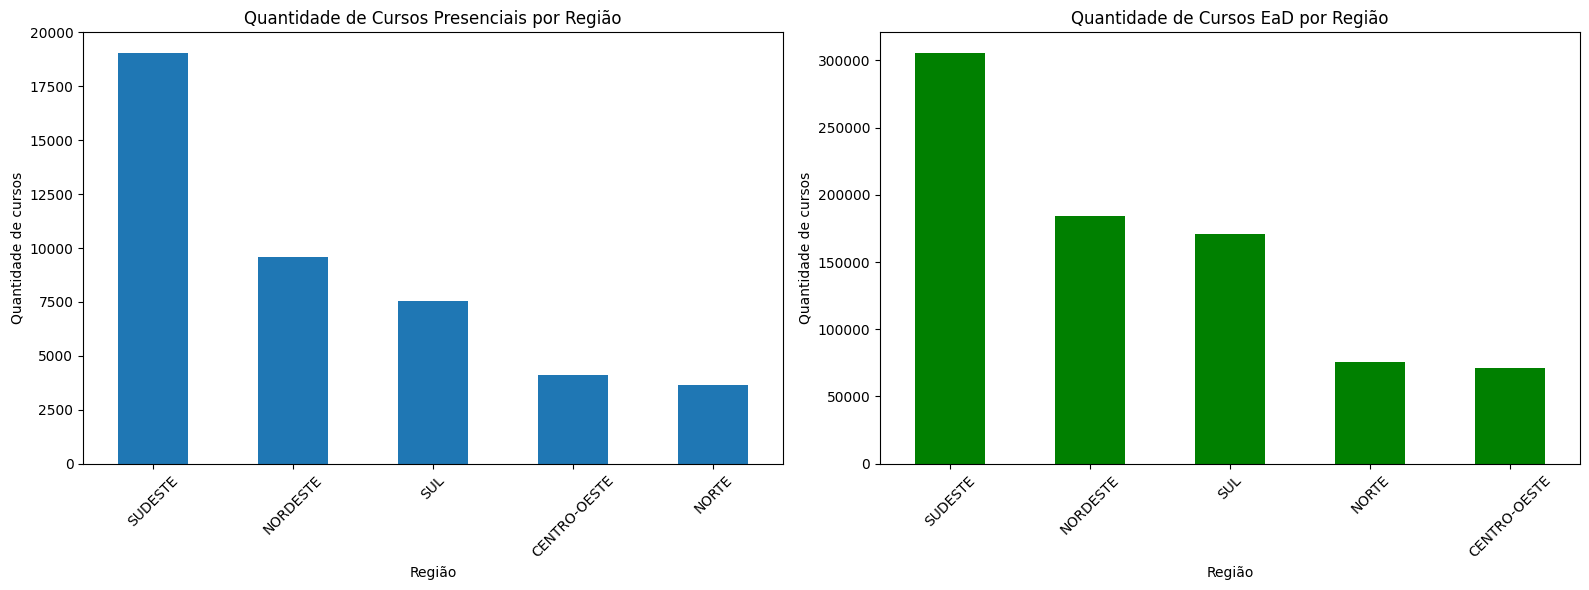

In [ ]:
presencial_por_regiao = df_ea[df_ea['MODALIDADE'] == 'Educação Presencial'].groupby('REGIAO')['MODALIDADE'].count().sort_values(ascending=False)

ead_por_regiao = df_ea[df_ea['MODALIDADE'] == 'Educação a Distância'].groupby('REGIAO')['MODALIDADE'].count().sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

presencial_por_regiao.plot(kind='bar', ax=axs[0])
axs[0].set_title('Quantidade de Cursos Presenciais por Região')
axs[0].set_xlabel('Região')
axs[0].set_ylabel('Quantidade de cursos')
axs[0].tick_params(axis='x', rotation=45)

ead_por_regiao.plot(kind='bar', ax=axs[1], color='green')
axs[1].set_title('Quantidade de Cursos EaD por Região')
axs[1].set_xlabel('Região')
axs[1].set_ylabel('Quantidade de cursos')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

Os gráficos tem uma tendência bem semelhante propoporcionalmente, exceto que o Centro-Oeste possui mais cursos presenciais que o Norte, e em compensação, o Norte possui mais cursos EaD.

Agora vamos ver como se comportamento essa análise para cada Unidade Federativa.

In [ ]:
df_ea[df_ea['MODALIDADE'] == 'Educação Presencial'].groupby('UF')['MODALIDADE'].count().sort_values(ascending=False)

UF
SP    10360
MG     4514
RJ     3299
PR     2931
BA     2719
RS     2590
SC     2020
GO     1669
PE     1638
CE     1442
AM     1181
PA     1177
DF      960
MA      924
MT      915
ES      881
PI      730
PB      672
RN      614
MS      583
AL      497
RO      471
SE      364
TO      331
AP      184
RR      152
AC      150
Name: MODALIDADE, dtype: int64

In [ ]:
df_ea[df_ea['MODALIDADE'] == 'Educação a Distância'].groupby('UF')['MODALIDADE'].count().sort_values(ascending=False)

UF
SP    145687
MG     98227
PR     67820
RS     60827
BA     56362
SC     42512
RJ     41522
PA     36998
CE     32666
GO     29347
MA     24816
PE     24772
MT     22407
ES     20237
MS     16619
PB     10921
AM     10454
RO     10274
PI      9643
RN      8885
AL      8504
SE      8018
TO      7660
AC      4973
DF      2831
AP      2730
RR      2648
Name: MODALIDADE, dtype: int64

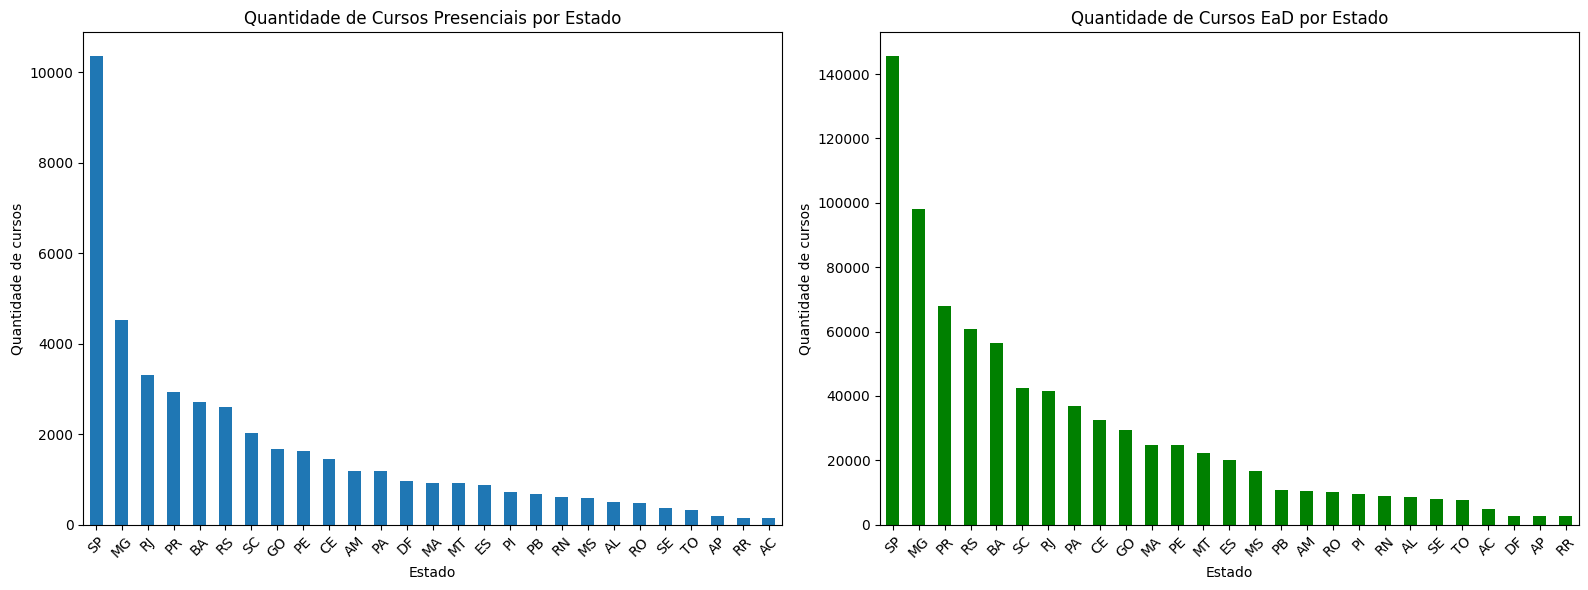

In [ ]:
presencial_por_estado = df_ea[df_ea['MODALIDADE'] == 'Educação Presencial'].groupby('UF')['MODALIDADE'].count().sort_values(ascending=False)

ead_por_estado = df_ea[df_ea['MODALIDADE'] == 'Educação a Distância'].groupby('UF')['MODALIDADE'].count().sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

presencial_por_estado.plot(kind='bar', ax=axs[0])
axs[0].set_title('Quantidade de Cursos Presenciais por Estado')
axs[0].set_xlabel('Estado')
axs[0].set_ylabel('Quantidade de cursos')
axs[0].tick_params(axis='x', rotation=45)

ead_por_estado.plot(kind='bar', ax=axs[1], color='green')
axs[1].set_title('Quantidade de Cursos EaD por Estado')
axs[1].set_xlabel('Estado')
axs[1].set_ylabel('Quantidade de cursos')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

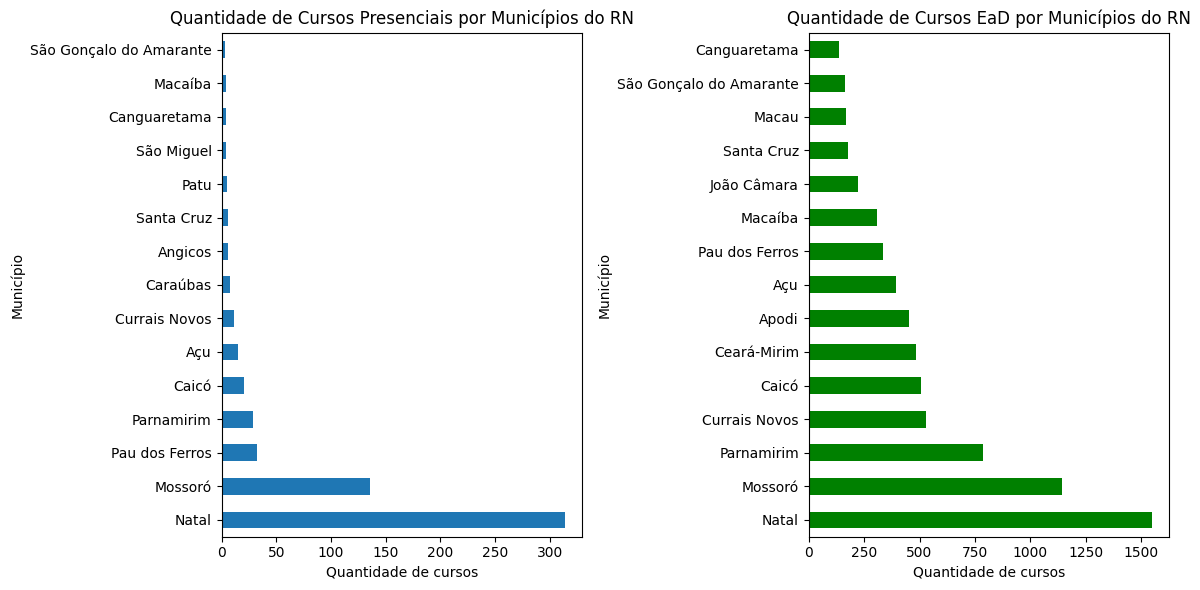

In [ ]:
df_earn_presencial = df_earn[df_earn['MODALIDADE'] == 'Educação Presencial']
df_earn_ead = df_earn[df_earn['MODALIDADE'] == 'Educação a Distância']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df_earn_presencial['MUNICIPIO'].value_counts().head(15).plot.barh(ax=axs[0])
axs[0].set_title('Quantidade de Cursos Presenciais por Municípios do RN')
axs[0].set_xlabel('Quantidade de cursos')
axs[0].set_ylabel('Município')

df_earn_ead['MUNICIPIO'].value_counts().head(15).plot.barh(ax=axs[1], color='green')
axs[1].set_title('Quantidade de Cursos EaD por Municípios do RN')
axs[1].set_xlabel('Quantidade de cursos')
axs[1].set_ylabel('Município')

plt.tight_layout()

plt.show()

Agora vamos analisar a quantidade de cursos por modalidade em seus respectivos Graus.


In [ ]:
df_ea[df_ea['MODALIDADE'] == 'Educação Presencial'].groupby('GRAU')['MODALIDADE'].count().sort_values(ascending=False)

GRAU
Bacharelado                      27114
Tecnológico                       8443
Licenciatura                      7995
Área Básica de Ingresso (ABI)      335
Sequencial                          81
Name: MODALIDADE, dtype: int64

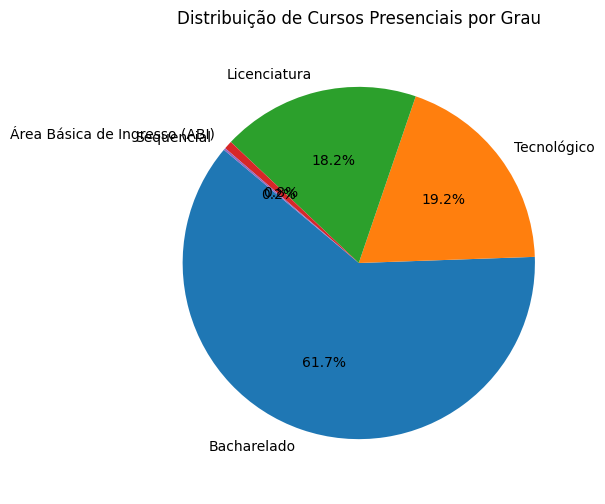

In [ ]:
df_ea_presencial_modalidade_grau = df_ea[df_ea['MODALIDADE'] == 'Educação Presencial']

df_ea_presencial_modalidade_grau_counts = df_ea_presencial_modalidade_grau.groupby('GRAU')['MODALIDADE'].count().sort_values(ascending=False)

plt.figure(figsize=(5,6))
plt.pie(df_ea_presencial_modalidade_grau_counts, labels=df_ea_presencial_modalidade_grau_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Cursos Presenciais por Grau')
plt.axis('equal')

plt.show()

In [ ]:
df_ea[df_ea['MODALIDADE'] == 'Educação a Distância'].groupby('GRAU')['MODALIDADE'].count().sort_values(ascending=False)

GRAU
Tecnológico                      437131
Bacharelado                      215848
Licenciatura                     155343
Área Básica de Ingresso (ABI)        36
Sequencial                            2
Name: MODALIDADE, dtype: int64

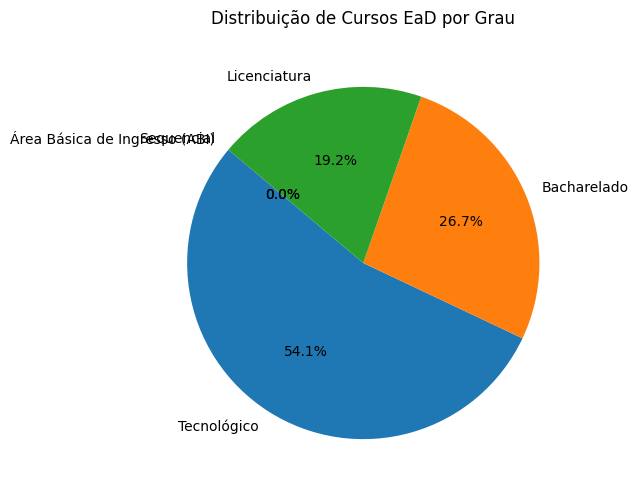

In [ ]:
df_ea_presencial_modalidade_grau = df_ea[df_ea['MODALIDADE'] == 'Educação a Distância']

df_ea_presencial_modalidade_grau_counts = df_ea_presencial_modalidade_grau.groupby('GRAU')['MODALIDADE'].count().sort_values(ascending=False)

plt.figure(figsize=(5,6))
plt.pie(df_ea_presencial_modalidade_grau_counts, labels=df_ea_presencial_modalidade_grau_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Cursos EaD por Grau')
plt.axis('equal')

plt.show()

Agora vamos construir a mesma análise para o Rio Grande do Norte.

In [ ]:
df_earn[df_earn['MODALIDADE'] == 'Educação Presencial'].groupby('GRAU')['MODALIDADE'].count().sort_values(ascending=False)

GRAU
Bacharelado                      385
Licenciatura                     124
Tecnológico                      103
Área Básica de Ingresso (ABI)      2
Name: MODALIDADE, dtype: int64

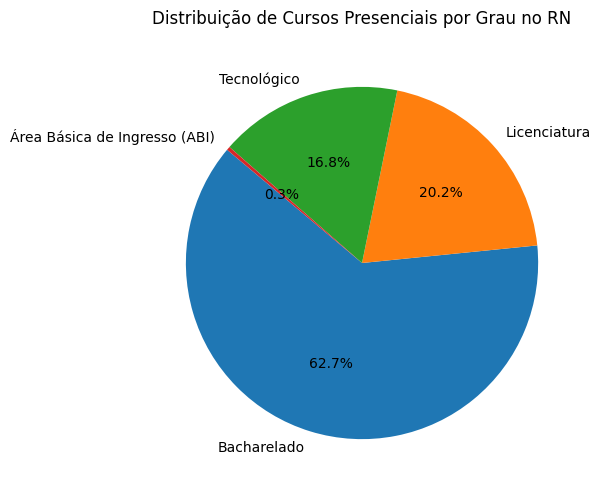

In [ ]:
df_earn_presencial_modalidade_grau = df_earn[df_earn['MODALIDADE'] == 'Educação Presencial']

df_earn_presencial_modalidade_grau_counts = df_earn_presencial_modalidade_grau.groupby('GRAU')['MODALIDADE'].count().sort_values(ascending=False)

plt.figure(figsize=(5,6))
plt.pie(df_earn_presencial_modalidade_grau_counts, labels=df_earn_presencial_modalidade_grau_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Cursos Presenciais por Grau no RN')
plt.axis('equal')

plt.show()

In [ ]:
df_earn[df_earn['MODALIDADE'] == 'Educação a Distância'].groupby('GRAU')['MODALIDADE'].count().sort_values(ascending=False)

GRAU
Tecnológico     4758
Bacharelado     2388
Licenciatura    1739
Name: MODALIDADE, dtype: int64

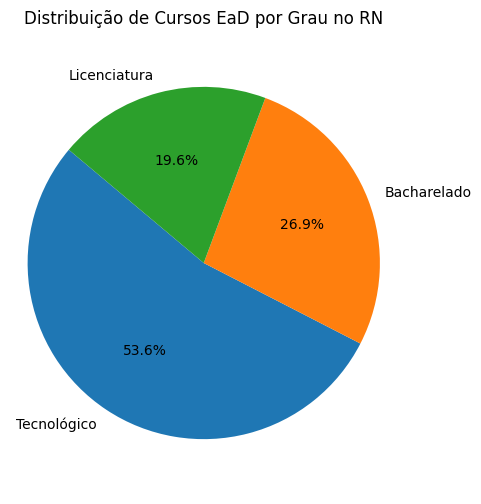

In [ ]:
df_earn_ead_modalidade_grau = df_earn[df_earn['MODALIDADE'] == 'Educação a Distância']

df_earn_ead_modalidade_grau_counts = df_earn_ead_modalidade_grau.groupby('GRAU')['MODALIDADE'].count().sort_values(ascending=False)

plt.figure(figsize=(5,6))
plt.pie(df_earn_ead_modalidade_grau_counts, labels=df_earn_ead_modalidade_grau_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Cursos EaD por Grau no RN')
plt.axis('equal')

plt.show()


Seguindo a mesma ideia, vamos analisar as categorias administrativas para cada modalidade e quais são mais frequentes que outras.

In [ ]:
df_ea[df_ea['MODALIDADE'] == 'Educação Presencial'].groupby('CATEGORIA_ADMINISTRATIVA')['MODALIDADE'].count().sort_values(ascending=False)

CATEGORIA_ADMINISTRATIVA
Privada com fins lucrativos    18915
Privada sem fins lucrativos    12851
Pública Federal                 6830
Pública Estadual                4498
Pública Municipal                557
Especial                         317
Name: MODALIDADE, dtype: int64

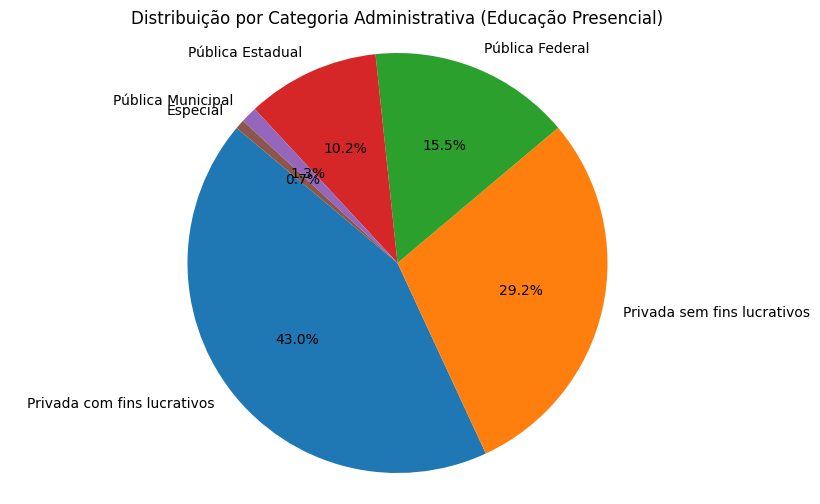

In [ ]:
df_ea_presencial_cat = df_ea[df_ea['MODALIDADE'] == 'Educação Presencial']

grouped_data = df_ea_presencial_cat.groupby('CATEGORIA_ADMINISTRATIVA')['MODALIDADE'].count()

sorted_data = grouped_data.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(sorted_data, labels=sorted_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por Categoria Administrativa (Educação Presencial)')
plt.axis('equal')
plt.show()

Como visto as faculdade privadas continuam detendo a maior quantidade de cursos presenciais.

In [ ]:
df_ea[df_ea['MODALIDADE'] == 'Educação a Distância'].groupby('CATEGORIA_ADMINISTRATIVA')['MODALIDADE'].count().sort_values(ascending=False)

CATEGORIA_ADMINISTRATIVA
Privada com fins lucrativos    717148
Privada sem fins lucrativos     82204
Pública Federal                  3928
Pública Municipal                2815
Pública Estadual                 1957
Especial                          308
Name: MODALIDADE, dtype: int64

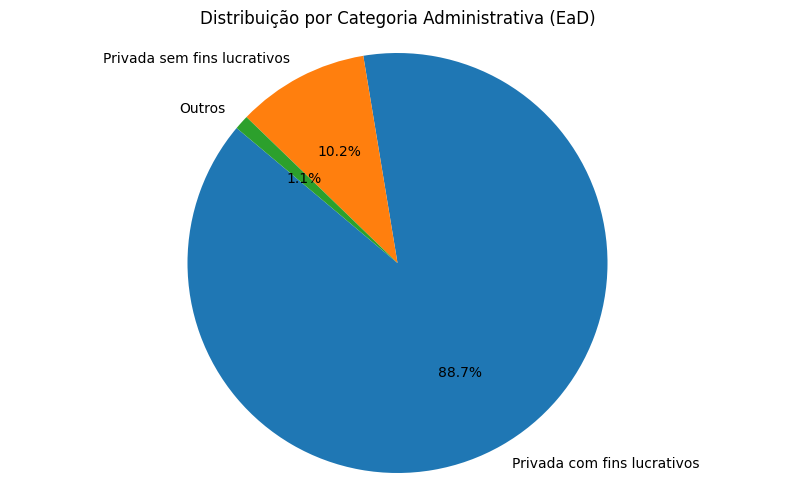

In [ ]:
df_ea_ead_cat = df_ea[df_ea['MODALIDADE'] == 'Educação a Distância']

grouped_data = df_ea_ead_cat.groupby('CATEGORIA_ADMINISTRATIVA')['MODALIDADE'].count()

sorted_data = grouped_data.sort_values(ascending=False)

threshold = sorted_data.sum() * 0.01
aggregated_data = sorted_data[sorted_data >= threshold]
aggregated_data['Outros'] = sorted_data[sorted_data < threshold].sum()

plt.figure(figsize=(10, 6))
plt.pie(aggregated_data, labels=aggregated_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por Categoria Administrativa (EaD)')
plt.axis('equal')
plt.show()

Assim como, a maioria dos cursos EaD são de faculdades privadas.

O que seria a Categoria Administrativa `Especial`?

Enquadra-se nessa categoria a instituição de educação superior criada por lei, estadual ou municipal, e existente na data da promulgação da Constituição Federal de 1988, que não seja total ou preponderantemente mantida com recursos públicos, portanto, não gratuita.

Fonte: [Diretoria de Estatísticas Educacionais (DEED)](https://www.uff.br/sites/default/files/paginas-internas-orgaos/modulo_ies_2016.pdf)

In [ ]:
df_ea[df_ea['CATEGORIA_ADMINISTRATIVA'] == 'Especial'].sort_values(by='CATEGORIA_ADMINISTRATIVA', ascending=False).head(10)

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
1515,UNIVERSIDADE DO CONTESTADO,Especial,Universidade,FARMÁCIA,Bacharelado,Educação a Distância,Em atividade,1000,4000,Canoinhas,SC,SUL
613208,UNIVERSIDADE DO CONTESTADO,Especial,Universidade,ADMINISTRAÇÃO,Bacharelado,Educação a Distância,Em atividade,700,3000,Concórdia,SC,SUL
597139,UNIVERSIDADE DO CONTESTADO,Especial,Universidade,EDUCAÇÃO ESPECIAL,Licenciatura,Educação a Distância,Em atividade,200,3200,Blumenau,SC,SUL
599402,CENTRO UNIVERSITÁRIO DAS FACULDADES ASSOCIADAS...,Especial,Centro Universitário,PEDAGOGIA,Licenciatura,Educação Presencial,Em atividade,180,3400,São João da Boa Vista,SP,SUDESTE
601698,UNIVERSIDADE DO CONTESTADO,Especial,Universidade,EDUCAÇÃO ESPECIAL,Licenciatura,Educação a Distância,Em atividade,200,3200,Canoinhas,SC,SUL
601940,UNIVERSIDADE DO CONTESTADO,Especial,Universidade,ADMINISTRAÇÃO,Bacharelado,Educação Presencial,Em atividade,50,3000,Curitibanos,SC,SUL
604143,CENTRO UNIVERSITÁRIO MUNICIPAL DE FRANCA,Especial,Centro Universitário,PSICOLOGIA,Bacharelado,Educação Presencial,Em atividade,50,4565,Franca,SP,SUDESTE
609246,UNIVERSIDADE DO CONTESTADO,Especial,Universidade,SECRETARIADO,Tecnológico,Educação a Distância,Em atividade,300,1620,Blumenau,SC,SUL
613149,INSTITUTO MUNICIPAL DE ENSINO SUPERIOR DE ASSIS,Especial,Faculdade,QUÍMICA,Bacharelado,Educação Presencial,Em atividade,100,3052,Assis,SP,SUDESTE
615006,UNIVERSIDADE DO CONTESTADO,Especial,Universidade,EDUCAÇÃO FÍSICA,Bacharelado,Educação a Distância,Em atividade,1000,3270,Porto União,SC,SUL


Agora vamos analisar quais cursos mais tem em cada modalidade.

Presencial:

In [ ]:
df_ea[df_ea['MODALIDADE'] == 'Educação Presencial']['NOME_CURSO'].value_counts().head(30)

NOME_CURSO
ADMINISTRAÇÃO                            2275
DIREITO                                  1965
PEDAGOGIA                                1884
EDUCAÇÃO FÍSICA                          1650
CIÊNCIAS CONTÁBEIS                       1494
ENFERMAGEM                               1376
PSICOLOGIA                               1260
ENGENHARIA CIVIL                         1181
FISIOTERAPIA                              983
CIÊNCIAS BIOLÓGICAS                       896
ENGENHARIA DE PRODUÇÃO                    879
NUTRIÇÃO                                  812
FARMÁCIA                                  793
GESTÃO DE RECURSOS HUMANOS                783
ARQUITETURA E URBANISMO                   752
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS     709
BIOMEDICINA                               696
MATEMÁTICA                                685
ODONTOLOGIA                               659
ENGENHARIA MECÂNICA                       638
ENGENHARIA ELÉTRICA                       608
LOGÍSTICA              

EaD:

In [ ]:
df_ea[df_ea['MODALIDADE'] == 'Educação a Distância']['NOME_CURSO'].value_counts().head(30)

NOME_CURSO
ADMINISTRAÇÃO                            17426
PEDAGOGIA                                17303
EDUCAÇÃO FÍSICA                          16363
CIÊNCIAS CONTÁBEIS                       15092
GESTÃO DE RECURSOS HUMANOS               14884
HISTÓRIA                                 14035
MATEMÁTICA                               13346
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS    13087
GESTÃO PÚBLICA                           12943
LOGÍSTICA                                12861
PROCESSOS GERENCIAIS                     12851
GESTÃO FINANCEIRA                        12762
GEOGRAFIA                                12134
GESTÃO COMERCIAL                         12105
CIÊNCIAS BIOLÓGICAS                      11759
MARKETING                                11510
GESTÃO AMBIENTAL                         11418
SERVIÇO SOCIAL                           11281
FILOSOFIA                                10167
ENGENHARIA DE PRODUÇÃO                    9992
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO        9868
GE

## **Situação dos cursos**

Esta seção pretende:

- Avaliar a proporção de cursos ativos e inativos.
- Analisar se existe alguma relação entre a situação dos cursos e a categoria da instituição de ensino superior e a modalidade.


In [ ]:
df['SITUACAO_CURSO'].unique()

array(['Em atividade', 'Em extinção', 'Extinto'], dtype=object)

Existem 3 categorias para a coluna `SITUAÇAO_CURSO`:
- *Em atividade*
- *Em extinção*
- *Extinto*

In [ ]:
df['SITUACAO_CURSO'].value_counts()

SITUACAO_CURSO
Em atividade    852328
Extinto          39479
Em extinção      10261
Name: count, dtype: int64

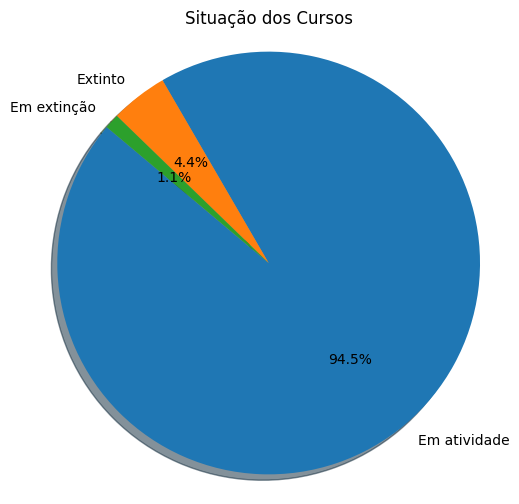

In [ ]:
sc_value_counts = df['SITUACAO_CURSO'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sc_value_counts.values, labels=sc_value_counts.index,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Situação dos Cursos')
plt.axis('equal')
plt.show()

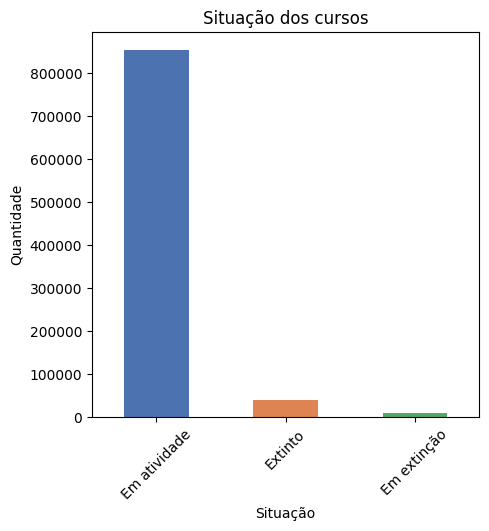

In [ ]:
plt.figure(figsize=(5, 5))

dfsituacao = df['SITUACAO_CURSO'].value_counts()
cores = sns.color_palette("deep", len(dfsituacao))

dfsituacao.plot(kind='bar', color=cores)

plt.title('Situação dos cursos')
plt.xlabel('Situação')
plt.ylabel('Quantidade')

plt.xticks(rotation=45)

plt.show()

Como visto, a maioria dos cursos criados ainda estão em atividade.

Agora analisando os cursos no Rio Grande do Norte

In [ ]:
df_rn = df[df['UF'] == 'RN'] # df_rn = cursos do RN em geral

In [ ]:
df_rn['SITUACAO_CURSO'].value_counts()

SITUACAO_CURSO
Em atividade    9499
Extinto          551
Em extinção       85
Name: count, dtype: int64

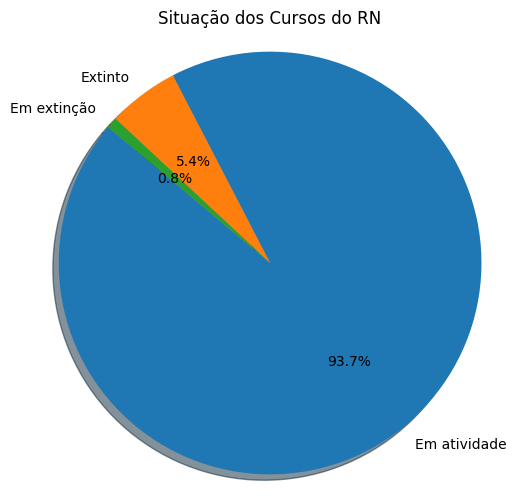

In [ ]:
sc_value_counts = df_rn['SITUACAO_CURSO'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sc_value_counts.values, labels=sc_value_counts.index,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Situação dos Cursos do RN')
plt.axis('equal')
plt.show()

Agora uma análise da situação pela modalidade.

In [ ]:
df.groupby(['SITUACAO_CURSO', 'MODALIDADE']).size().unstack()

MODALIDADE,Educação Presencial,Educação a Distância
SITUACAO_CURSO,,
Em atividade,43968,808360
Em extinção,6306,3955
Extinto,22363,17116


In [ ]:
df[df['MODALIDADE'] == 'Educação Presencial'].groupby('SITUACAO_CURSO')['MODALIDADE'].count().sort_values(ascending=False)

SITUACAO_CURSO
Em atividade    43968
Extinto         22363
Em extinção      6306
Name: MODALIDADE, dtype: int64

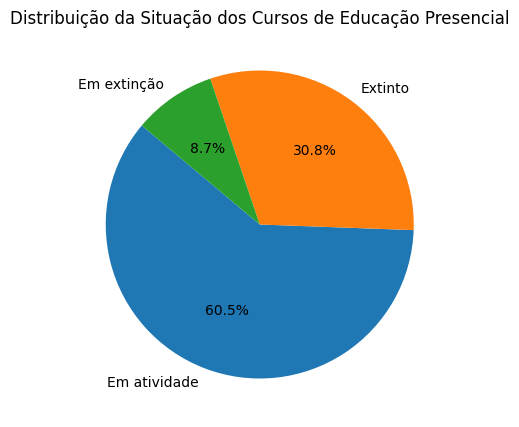

In [ ]:
labels = df[df['MODALIDADE'] == 'Educação Presencial']['SITUACAO_CURSO'].value_counts().index
sizes = df[df['MODALIDADE'] == 'Educação Presencial']['SITUACAO_CURSO'].value_counts().values
cores = sns.color_palette("tab10", len(labels))

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição da Situação dos Cursos de Educação Presencial')

plt.show()

Um pouco mais da metade dos cursos presenciais estão em atividade.

In [ ]:
df[df['MODALIDADE'] == 'Educação a Distância'].groupby('SITUACAO_CURSO')['MODALIDADE'].count().sort_values(ascending=False)

SITUACAO_CURSO
Em atividade    808360
Extinto          17116
Em extinção       3955
Name: MODALIDADE, dtype: int64

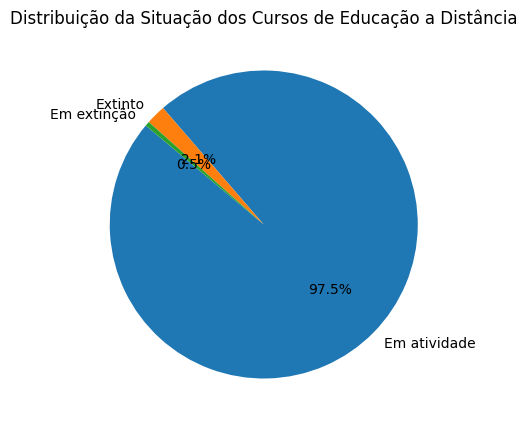

In [ ]:
labels = df[df['MODALIDADE'] == 'Educação a Distância']['SITUACAO_CURSO'].value_counts().index
sizes = df[df['MODALIDADE'] == 'Educação a Distância']['SITUACAO_CURSO'].value_counts().values
cores = sns.color_palette("tab10", len(labels))

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição da Situação dos Cursos de Educação a Distância')

plt.show()

A maioria dos cursos EaD estão Em Atividade.

A seguir uma análise das situações dos cursos por categoria administrativa.

In [ ]:
df.groupby(['SITUACAO_CURSO', 'CATEGORIA_ADMINISTRATIVA']).size().unstack()

CATEGORIA_ADMINISTRATIVA,Especial,Privada com fins lucrativos,Privada sem fins lucrativos,Pública Estadual,Pública Federal,Pública Municipal
SITUACAO_CURSO,,,,,,
Em atividade,625,736063,95055,6455,10758,3372
Em extinção,24,3721,4979,771,716,50
Extinto,134,21248,11803,2754,3328,212


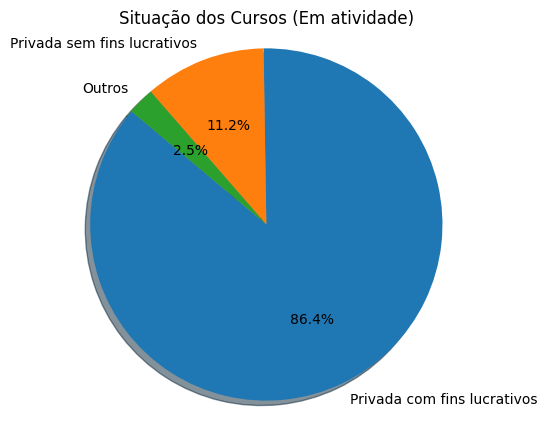

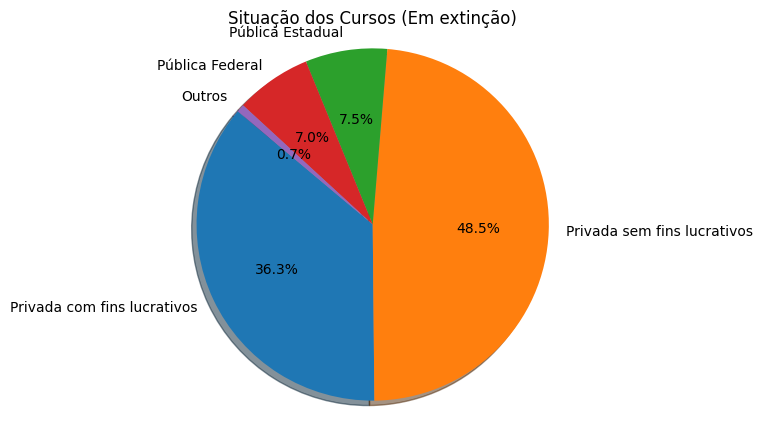

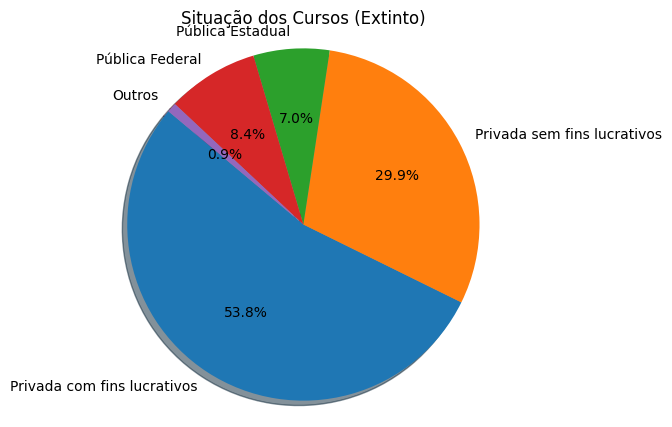

In [ ]:
grouped_stcat = df.groupby(['SITUACAO_CURSO', 'CATEGORIA_ADMINISTRATIVA']).size().unstack()

def plot_pie_for_situacao(situacao, threshold=0.05):
    values = grouped_stcat.loc[situacao].dropna()
    total = values.sum()
    labels = values.index
    sizes = values.values

    other_values = values[values/total < threshold]
    main_values = values[values/total >= threshold]

    if len(other_values) > 0:
        main_values['Outros'] = other_values.sum()

    labels = main_values.index
    sizes = main_values.values

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f'Situação dos Cursos ({situacao})')
    plt.axis('equal')
    plt.show()

situacoes = grouped_stcat.index
for situacao in situacoes:
    plot_pie_for_situacao(situacao)

Algo interessante de ser observado é alta porcentagem de cursos em extinção e extintos para a categoria administrativa `Privada sem fins lucrativos`.

In [ ]:
df.groupby(['SITUACAO_CURSO', 'REGIAO']).size().unstack()

REGIAO,CENTRO-OESTE,NORDESTE,NORTE,SUDESTE,SUL
SITUACAO_CURSO,,,,,
Em atividade,75331,194187,79383,324727,178700
Em extinção,745,1416,765,5349,1986
Extinto,3742,7365,2622,17779,7971


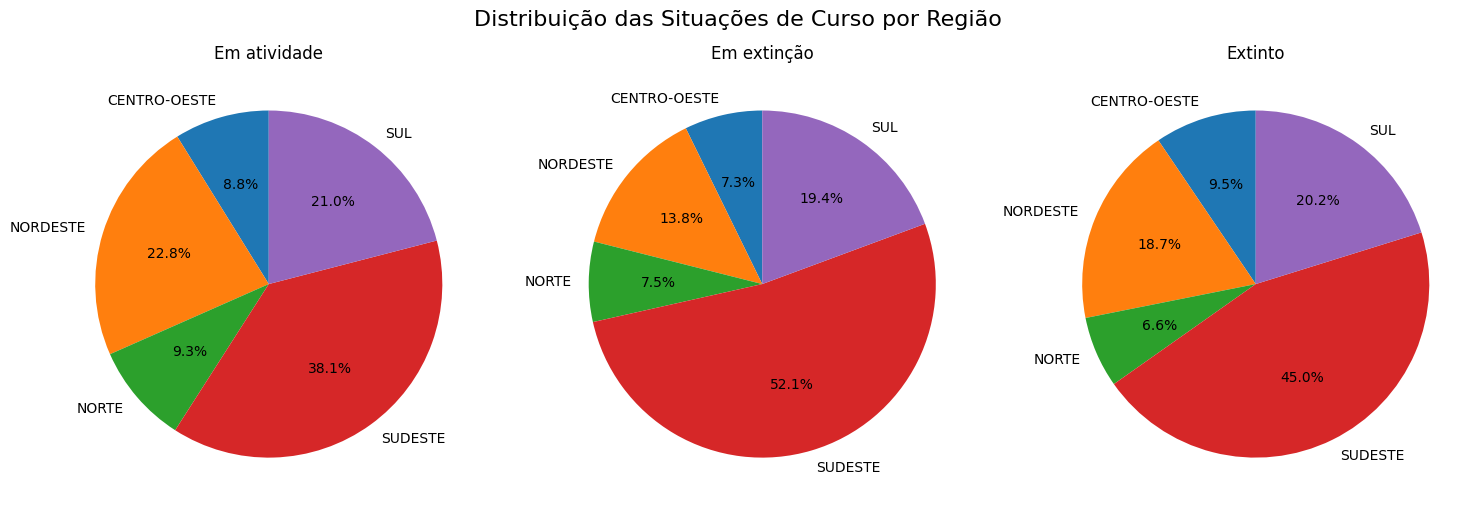

In [ ]:
dados_agrupados_streg = df.groupby(['SITUACAO_CURSO', 'REGIAO']).size().unstack()

situacoes = list(dados_agrupados_streg.columns)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, (regiao, dados) in enumerate(dados_agrupados_streg.iterrows()):
    axs[i // 3, i % 3].pie(dados, labels=situacoes, autopct='%1.1f%%', startangle=90)
    axs[i // 3, i % 3].set_title(regiao)

for ax in axs.flat[len(dados_agrupados_streg):]:
    ax.remove()

plt.suptitle('Distribuição das Situações de Curso por Região', fontsize=16)

plt.tight_layout()
plt.show()

Importante lembrar que as regiões Centro-Oeste e Norte são as que possuem menos cursos. Isso ajudará a ter uma visão menos enviesada dessa análise.

## **Cursos de tecnologia**

Nesta seção, decidi seguir a mesma linha das análises anteriores, porém, com um filtro para os principais cursos de Tecnologia da Informação no Brasil.

In [ ]:
dfti.head()

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
7,CENTRO UNIVERSITÁRIO ESTÁCIO DE RIBEIRÃO PRETO,Privada com fins lucrativos,Centro Universitário,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,Tecnológico,Educação a Distância,Em atividade,3630,2568,Timbó,SC,SUL
8,UNIVERSIDADE CÂNDIDO MENDES,Privada sem fins lucrativos,Universidade,GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,848,2100,Belford Roxo,RJ,SUDESTE
14,Universidade Pitágoras Unopar Anhanguera,Privada com fins lucrativos,Universidade,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,Tecnológico,Educação a Distância,Em atividade,37520,2100,Águas Lindas de Goiás,GO,CENTRO-OESTE
16,CENTRO UNIVERSITÁRIO DOM PEDRO II,Privada com fins lucrativos,Centro Universitário,JOGOS DIGITAIS,Tecnológico,Educação a Distância,Em atividade,1600,2100,Valente,BA,NORDESTE
26,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,2500,2000,Capanema,PA,NORTE


Uma das minhas primeiras curiosidades foi procurar o curso do BTI na UFRN. E como visto abaixo, ele foi preenchido corretamente.

In [ ]:
dfti[(dfti['NOME_IES'] == 'UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE') & (dfti['NOME_CURSO'] == 'TECNOLOGIA DA INFORMAÇÃO')]

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
295004,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Bacharelado,Educação Presencial,Em atividade,300,2600,Natal,RN,NORDESTE


Como podem notar, existem 14 cursos cujo nome é Tecnologia da Informação.

In [ ]:
dfti['NOME_CURSO'].value_counts()

NOME_CURSO
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS    13796
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO       10096
ENGENHARIA DE SOFTWARE                    6635
REDES DE COMPUTADORES                     6399
JOGOS DIGITAIS                            6385
SISTEMAS PARA INTERNET                    6324
SISTEMAS DE INFORMAÇÃO                    5140
CIÊNCIA DA COMPUTAÇÃO                     4136
BANCO DE DADOS                            3164
ENGENHARIA DE COMPUTAÇÃO                  2625
ENGENHARIA DE CONTROLE E AUTOMAÇÃO         457
ENGENHARIA MECATRÔNICA                     433
ENGENHARIA DE TELECOMUNICAÇÕES              25
TECNOLOGIA DA INFORMAÇÃO                    14
Name: count, dtype: int64

In [ ]:
dfti[dfti['NOME_CURSO'] == 'TECNOLOGIA DA INFORMAÇÃO'].head(14)

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
15988,UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,1000,2400,Bonito,MS,CENTRO-OESTE
166985,UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,1000,2400,Três Lagoas,MS,CENTRO-OESTE
283287,UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,1000,2400,Campo Grande,MS,CENTRO-OESTE
295004,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Bacharelado,Educação Presencial,Em atividade,300,2600,Natal,RN,NORDESTE
495029,FACULDADE MASTER DE PARAUAPEBAS - FAMAP,Privada com fins lucrativos,Faculdade,TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,750,2175,Parauapebas,PA,NORTE
575374,UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,1000,2400,Corumbá,MS,CENTRO-OESTE
665978,UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,1000,2400,Paranaíba,MS,CENTRO-OESTE
718696,UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,1000,2400,Nova Andradina,MS,CENTRO-OESTE
782032,UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,1000,2400,Chapadão do Sul,MS,CENTRO-OESTE
797492,UNIVERSIDADE FEDERAL DE MATO GROSSO DO SUL,Pública Federal,Universidade,TECNOLOGIA DA INFORMAÇÃO,Tecnológico,Educação a Distância,Em atividade,1000,2400,Coxim,MS,CENTRO-OESTE


O BTI da UFRN é o único curso de grau Bacharelado e modalidade Presencial.

Dando continuidade... Os gráficos abaixo são auto-explicativos.

In [ ]:
dfti['NOME_CURSO'].value_counts()

NOME_CURSO
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS    13796
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO       10096
ENGENHARIA DE SOFTWARE                    6635
REDES DE COMPUTADORES                     6399
JOGOS DIGITAIS                            6385
SISTEMAS PARA INTERNET                    6324
SISTEMAS DE INFORMAÇÃO                    5140
CIÊNCIA DA COMPUTAÇÃO                     4136
BANCO DE DADOS                            3164
ENGENHARIA DE COMPUTAÇÃO                  2625
ENGENHARIA DE CONTROLE E AUTOMAÇÃO         457
ENGENHARIA MECATRÔNICA                     433
ENGENHARIA DE TELECOMUNICAÇÕES              25
TECNOLOGIA DA INFORMAÇÃO                    14
Name: count, dtype: int64

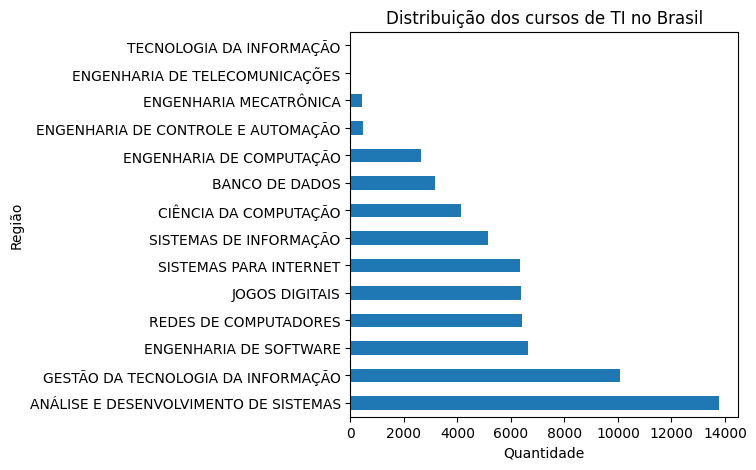

In [ ]:
dfti['NOME_CURSO'].value_counts().plot.barh(figsize=(5, 5))
plt.title('Distribuição dos cursos de TI no Brasil')
plt.xlabel('Quantidade')
plt.ylabel('Região')
plt.show()

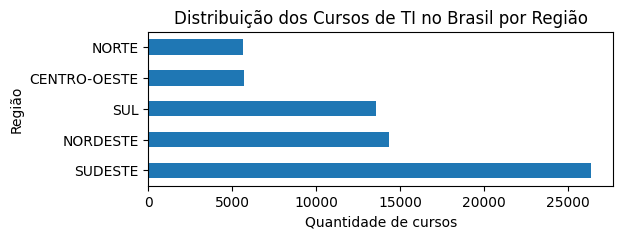

In [ ]:
dfti['REGIAO'].value_counts().plot.barh(figsize=(6, 2))
plt.title('Distribuição dos Cursos de TI no Brasil por Região')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Região')
plt.show()

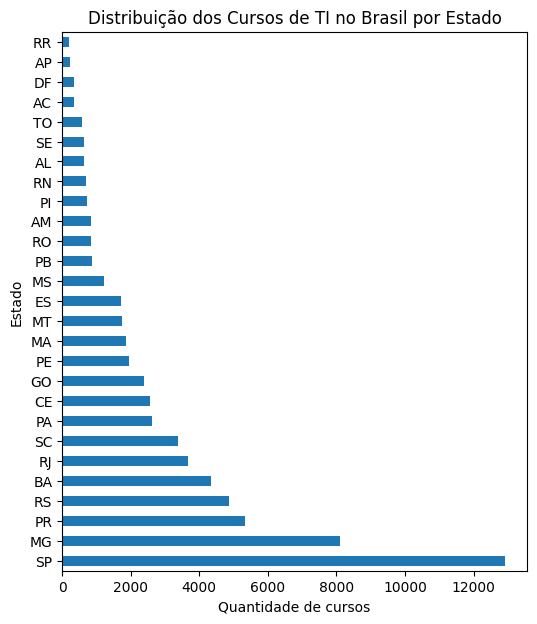

In [ ]:
dfti['UF'].value_counts().plot.barh(figsize=(6, 7))
plt.title('Distribuição dos Cursos de TI no Brasil por Estado')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Estado')
plt.show()

In [ ]:
cursos_ti_rn = dfti[dfti['UF'] == 'RN']

In [ ]:
cursos_ti_rn['NOME_CURSO'].value_counts()

NOME_CURSO
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS    155
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO        98
REDES DE COMPUTADORES                     75
ENGENHARIA DE SOFTWARE                    73
JOGOS DIGITAIS                            66
SISTEMAS PARA INTERNET                    62
SISTEMAS DE INFORMAÇÃO                    50
CIÊNCIA DA COMPUTAÇÃO                     44
BANCO DE DADOS                            34
ENGENHARIA DE COMPUTAÇÃO                  33
ENGENHARIA DE CONTROLE E AUTOMAÇÃO         5
ENGENHARIA MECATRÔNICA                     2
ENGENHARIA DE TELECOMUNICAÇÕES             1
TECNOLOGIA DA INFORMAÇÃO                   1
Name: count, dtype: int64

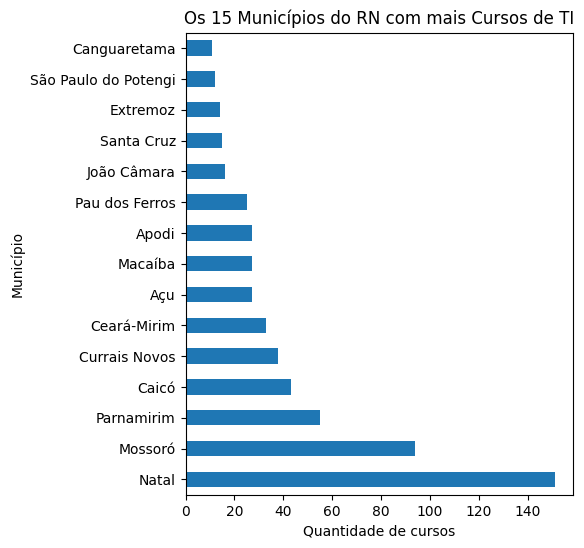

In [ ]:
cursos_ti_rn['MUNICIPIO'].value_counts().head(15).plot.barh(figsize=(5, 6))
plt.title('Os 15 Municípios do RN com mais Cursos de TI')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Município')
plt.show()

Dando continuidade, veremos a distribuição dos cursos por modalidade de ensino.

In [ ]:
dfti['MODALIDADE'].value_counts()

MODALIDADE
Educação a Distância    62483
Educação Presencial      3146
Name: count, dtype: int64

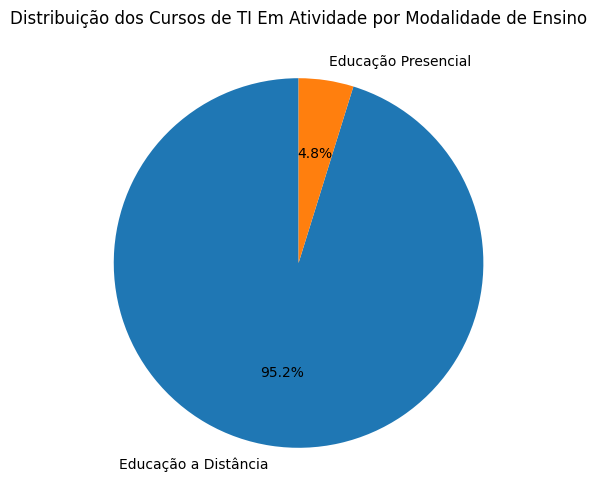

In [ ]:
value_counts = dfti['MODALIDADE'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Cursos de TI Em Atividade por Modalidade de Ensino')
plt.show()

In [ ]:
dfti.groupby('NOME_CURSO')['MODALIDADE'].value_counts().sort_values(ascending=False)

NOME_CURSO                             MODALIDADE          
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  Educação a Distância    13087
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO     Educação a Distância     9868
ENGENHARIA DE SOFTWARE                 Educação a Distância     6523
JOGOS DIGITAIS                         Educação a Distância     6268
SISTEMAS PARA INTERNET                 Educação a Distância     6182
REDES DE COMPUTADORES                  Educação a Distância     6135
SISTEMAS DE INFORMAÇÃO                 Educação a Distância     4665
CIÊNCIA DA COMPUTAÇÃO                  Educação a Distância     3660
BANCO DE DADOS                         Educação a Distância     3128
ENGENHARIA DE COMPUTAÇÃO               Educação a Distância     2318
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  Educação Presencial       709
CIÊNCIA DA COMPUTAÇÃO                  Educação Presencial       476
SISTEMAS DE INFORMAÇÃO                 Educação Presencial       475
ENGENHARIA MECATRÔNICA                 Educ

In [ ]:
dfti[dfti['MODALIDADE'] == 'Educação Presencial'].groupby(['NOME_CURSO', 'MODALIDADE']).size().sort_values(ascending=False)

NOME_CURSO                             MODALIDADE         
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  Educação Presencial    709
CIÊNCIA DA COMPUTAÇÃO                  Educação Presencial    476
SISTEMAS DE INFORMAÇÃO                 Educação Presencial    475
ENGENHARIA DE COMPUTAÇÃO               Educação Presencial    307
REDES DE COMPUTADORES                  Educação Presencial    264
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO     Educação Presencial    228
ENGENHARIA DE CONTROLE E AUTOMAÇÃO     Educação Presencial    209
SISTEMAS PARA INTERNET                 Educação Presencial    142
JOGOS DIGITAIS                         Educação Presencial    117
ENGENHARIA DE SOFTWARE                 Educação Presencial    112
ENGENHARIA MECATRÔNICA                 Educação Presencial     45
BANCO DE DADOS                         Educação Presencial     36
ENGENHARIA DE TELECOMUNICAÇÕES         Educação Presencial     25
TECNOLOGIA DA INFORMAÇÃO               Educação Presencial      1
dtype: int64

In [ ]:
dfti[dfti['MODALIDADE'] == 'Educação a Distância'].groupby(['NOME_CURSO', 'MODALIDADE']).size().sort_values(ascending=False)

NOME_CURSO                             MODALIDADE          
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS  Educação a Distância    13087
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO     Educação a Distância     9868
ENGENHARIA DE SOFTWARE                 Educação a Distância     6523
JOGOS DIGITAIS                         Educação a Distância     6268
SISTEMAS PARA INTERNET                 Educação a Distância     6182
REDES DE COMPUTADORES                  Educação a Distância     6135
SISTEMAS DE INFORMAÇÃO                 Educação a Distância     4665
CIÊNCIA DA COMPUTAÇÃO                  Educação a Distância     3660
BANCO DE DADOS                         Educação a Distância     3128
ENGENHARIA DE COMPUTAÇÃO               Educação a Distância     2318
ENGENHARIA MECATRÔNICA                 Educação a Distância      388
ENGENHARIA DE CONTROLE E AUTOMAÇÃO     Educação a Distância      248
TECNOLOGIA DA INFORMAÇÃO               Educação a Distância       13
dtype: int64

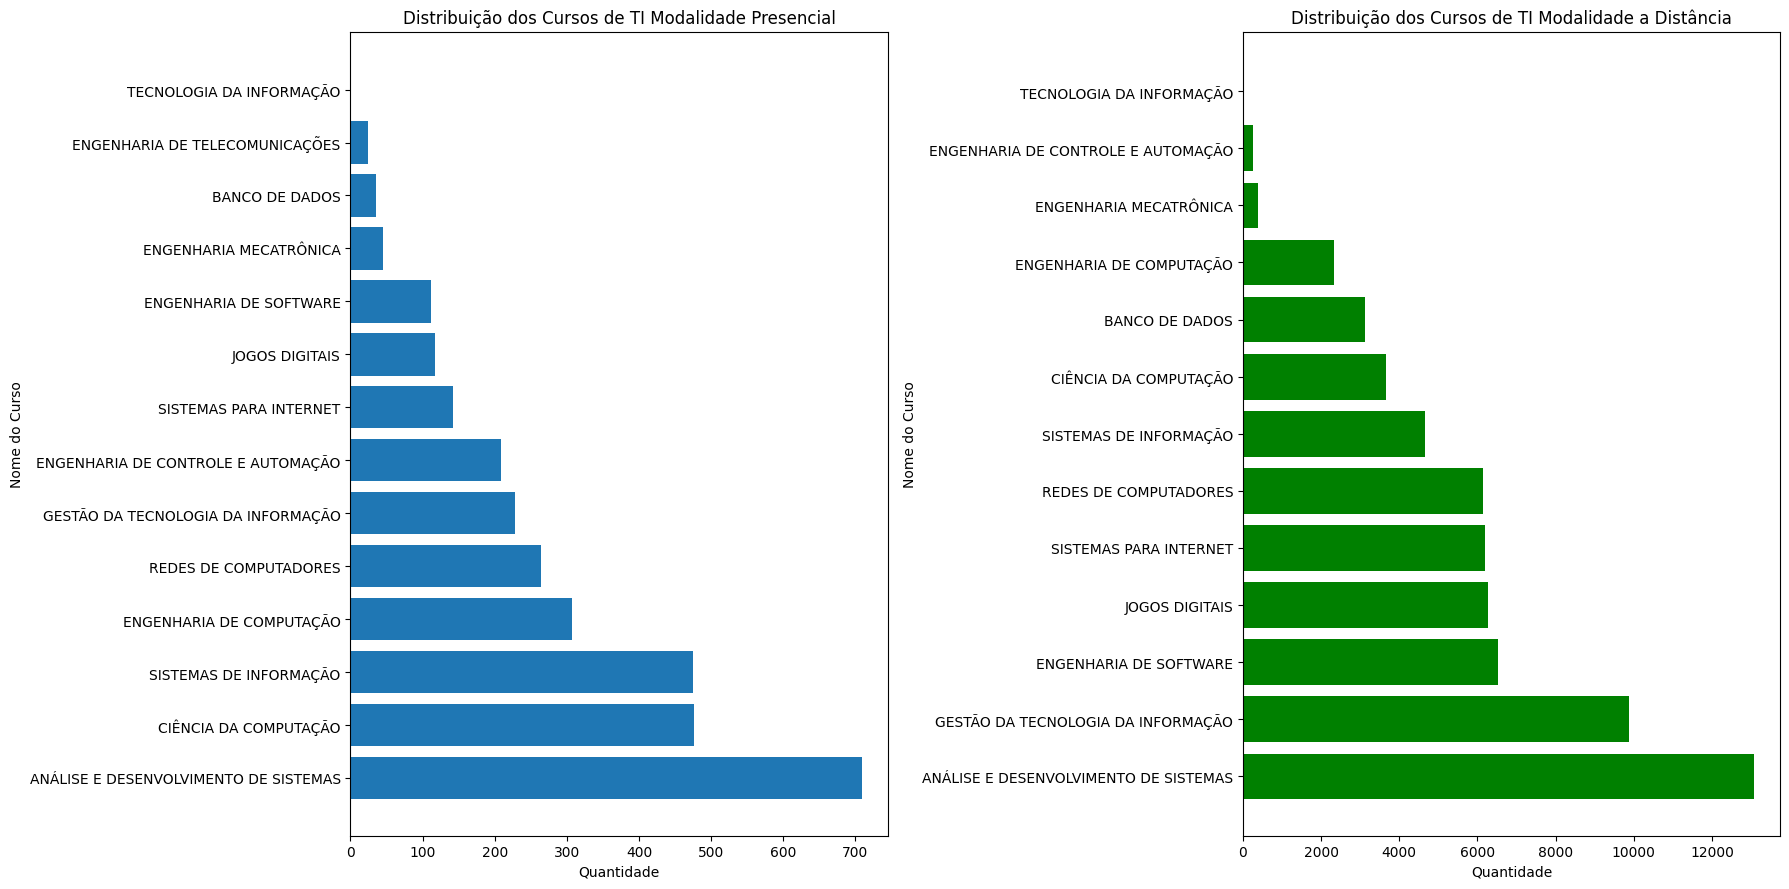

In [ ]:
presencial = dfti[dfti['MODALIDADE'] == 'Educação Presencial'].groupby(['NOME_CURSO', 'MODALIDADE']).size().sort_values(ascending=False)
distancia = dfti[dfti['MODALIDADE'] == 'Educação a Distância'].groupby(['NOME_CURSO', 'MODALIDADE']).size().sort_values(ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(18, 9))

axs[0].barh(presencial.index.get_level_values(0), presencial)
axs[0].set_title('Distribuição dos Cursos de TI Modalidade Presencial')
axs[0].set_xlabel('Quantidade')
axs[0].set_ylabel('Nome do Curso')

axs[1].barh(distancia.index.get_level_values(0), distancia, color='green')
axs[1].set_title('Distribuição dos Cursos de TI Modalidade a Distância')
axs[1].set_xlabel('Quantidade')
axs[1].set_ylabel('Nome do Curso')

plt.tight_layout()
plt.show()

Agora vamos analisar a situação dos cursos de TI

In [ ]:
dftig = df[df['NOME_CURSO'].isin(cursos_ti)] # dataframe ti geral que inclui todos os cursos incluindos os extintos e em extinçao

In [ ]:
dftig['NOME_CURSO'] = dftig['NOME_CURSO'].replace('CIÊNCIAS DA COMPUTAÇÃO', 'CIÊNCIA DA COMPUTAÇÃO')
dftig['NOME_CURSO'] = dftig['NOME_CURSO'].replace('CIêNCIAS DE COMPUTAçãO', 'CIÊNCIA DA COMPUTAÇÃO')

dftig['NOME_CURSO'] = dftig['NOME_CURSO'].replace('ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA DE COMPUTAÇÃO')

dftig['NOME_CURSO'] = dftig['NOME_CURSO'].replace('GESTÃO EM TECNOLOGIA DA INFORMAÇÃO', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO')
dftig['NOME_CURSO'] = dftig['NOME_CURSO'].replace('GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO')

<ipython-input-252-591c12aecbb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftig['NOME_CURSO'] = dftig['NOME_CURSO'].replace('CIÊNCIAS DA COMPUTAÇÃO', 'CIÊNCIA DA COMPUTAÇÃO')
<ipython-input-252-591c12aecbb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftig['NOME_CURSO'] = dftig['NOME_CURSO'].replace('CIêNCIAS DE COMPUTAçãO', 'CIÊNCIA DA COMPUTAÇÃO')
<ipython-input-252-591c12aecbb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
dftig['SITUACAO_CURSO'].value_counts()

SITUACAO_CURSO
Em atividade    65629
Extinto          1581
Em extinção       857
Name: count, dtype: int64

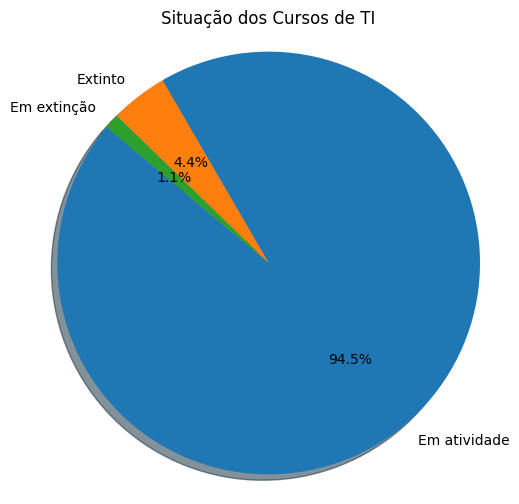

In [ ]:
scti_value_counts = df['SITUACAO_CURSO'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(scti_value_counts.values, labels=scti_value_counts.index,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Situação dos Cursos de TI')
plt.axis('equal')
plt.show()

In [ ]:
dftig[dftig['SITUACAO_CURSO'] == 'Extinto']['NOME_CURSO'].value_counts().head(14)

NOME_CURSO
CIÊNCIA DA COMPUTAÇÃO                    223
SISTEMAS PARA INTERNET                   211
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS    209
REDES DE COMPUTADORES                    199
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO       172
SISTEMAS DE INFORMAÇÃO                   171
BANCO DE DADOS                            98
JOGOS DIGITAIS                            88
ENGENHARIA DE CONTROLE E AUTOMAÇÃO        71
ENGENHARIA DE COMPUTAÇÃO                  68
ENGENHARIA MECATRÔNICA                    22
TECNOLOGIA DA INFORMAÇÃO                  22
ENGENHARIA DE TELECOMUNICAÇÕES            19
ENGENHARIA DE SOFTWARE                     8
Name: count, dtype: int64

In [ ]:
dftig[dftig['SITUACAO_CURSO'] == 'Em extinção']['NOME_CURSO'].value_counts().head(14)

NOME_CURSO
ENGENHARIA DE COMPUTAÇÃO                 198
CIÊNCIA DA COMPUTAÇÃO                    162
JOGOS DIGITAIS                           102
SISTEMAS DE INFORMAÇÃO                    86
SISTEMAS PARA INTERNET                    84
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS     70
REDES DE COMPUTADORES                     68
ENGENHARIA DE CONTROLE E AUTOMAÇÃO        32
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO        24
BANCO DE DADOS                            13
ENGENHARIA DE TELECOMUNICAÇÕES             9
ENGENHARIA MECATRÔNICA                     7
ENGENHARIA DE SOFTWARE                     2
Name: count, dtype: int64

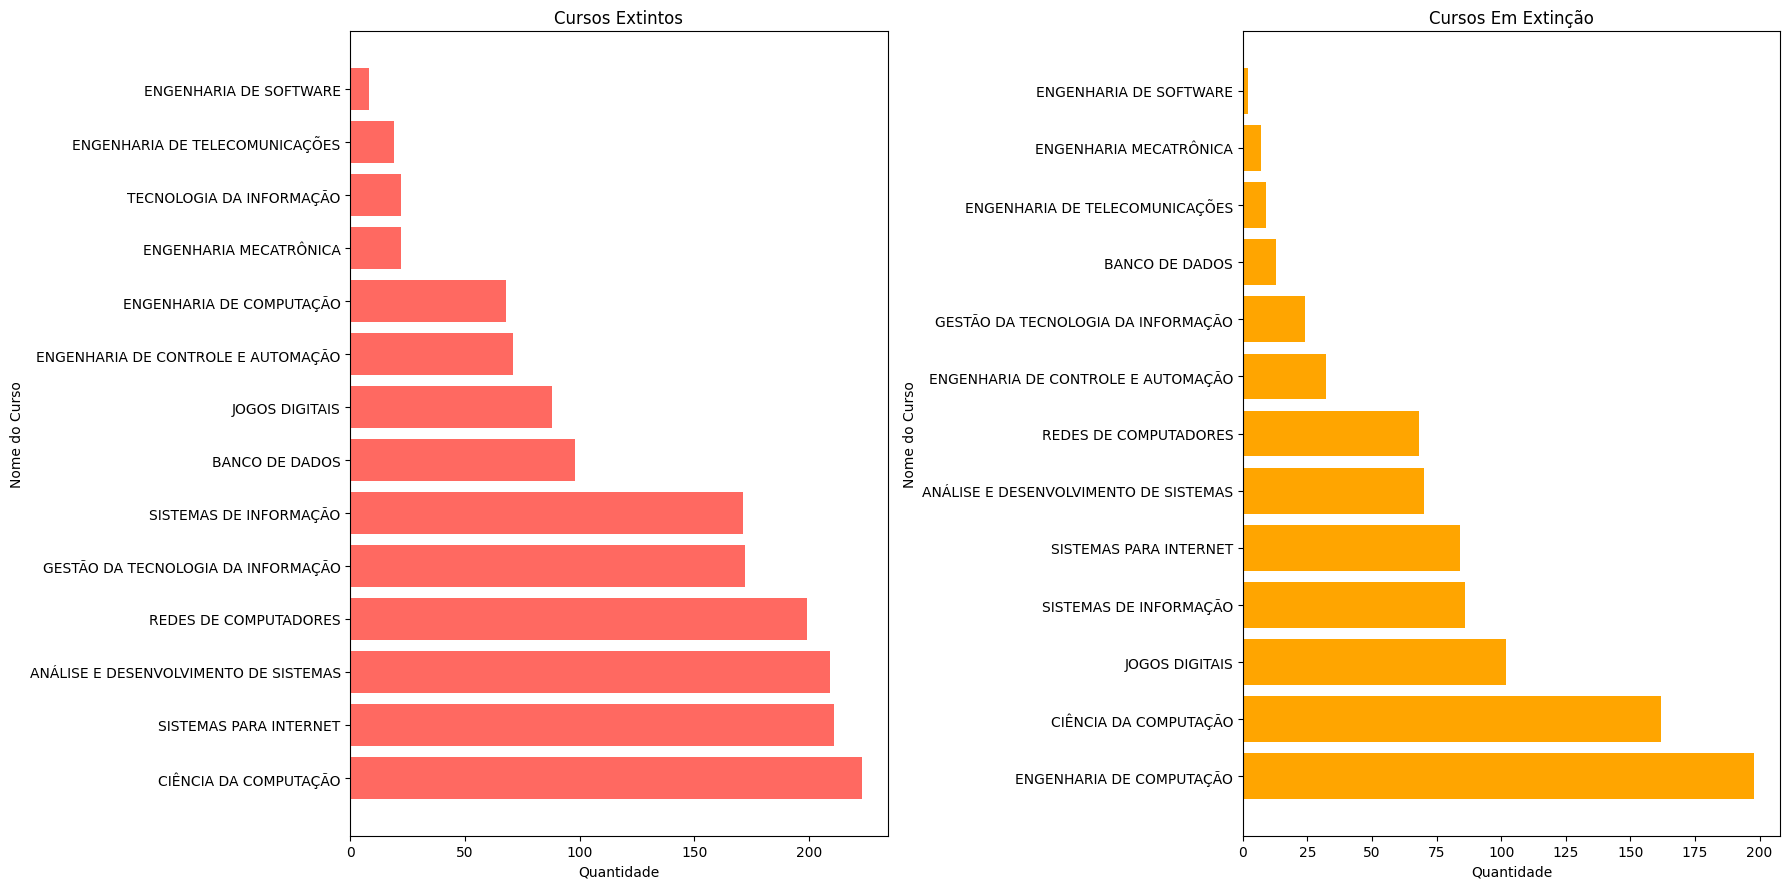

In [ ]:
extinto = dftig[dftig['SITUACAO_CURSO'] == 'Extinto']['NOME_CURSO'].value_counts().head(14)
em_extincao = dftig[dftig['SITUACAO_CURSO'] == 'Em extinção']['NOME_CURSO'].value_counts().head(14)

fig, axs = plt.subplots(1, 2, figsize=(18, 9))

axs[0].barh(extinto.index, extinto, color='#FF6961')
axs[0].set_title('Cursos Extintos')
axs[0].set_xlabel('Quantidade')
axs[0].set_ylabel('Nome do Curso')

axs[1].barh(em_extincao.index, em_extincao, color='orange')
axs[1].set_title('Cursos Em Extinção')
axs[1].set_xlabel('Quantidade')
axs[1].set_ylabel('Nome do Curso')

plt.tight_layout()
plt.show()


Agora vamos analisar a quantidade de vagas por curso.

In [ ]:
dfti_limpo_qtv.groupby('NOME_CURSO')['QT_VAGAS_AUTORIZADAS'].sum().reset_index().sort_values(by='QT_VAGAS_AUTORIZADAS', ascending=False)

,NOME_CURSO,QT_VAGAS_AUTORIZADAS
0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,2.387414e+06
8,GESTÃO DA TECNOLOGIA DA INFORMAÇÃO,1.707366e+06
12,SISTEMAS PARA INTERNET,1.692091e+06
9,JOGOS DIGITAIS,1.685709e+06
11,SISTEMAS DE INFORMAÇÃO,1.351933e+06
10,REDES DE COMPUTADORES,1.152963e+06
2,CIÊNCIA DA COMPUTAÇÃO,1.045117e+06
1,BANCO DE DADOS,1.003935e+06
5,ENGENHARIA DE SOFTWARE,9.761154e+05
3,ENGENHARIA DE COMPUTAÇÃO,7.162331e+05


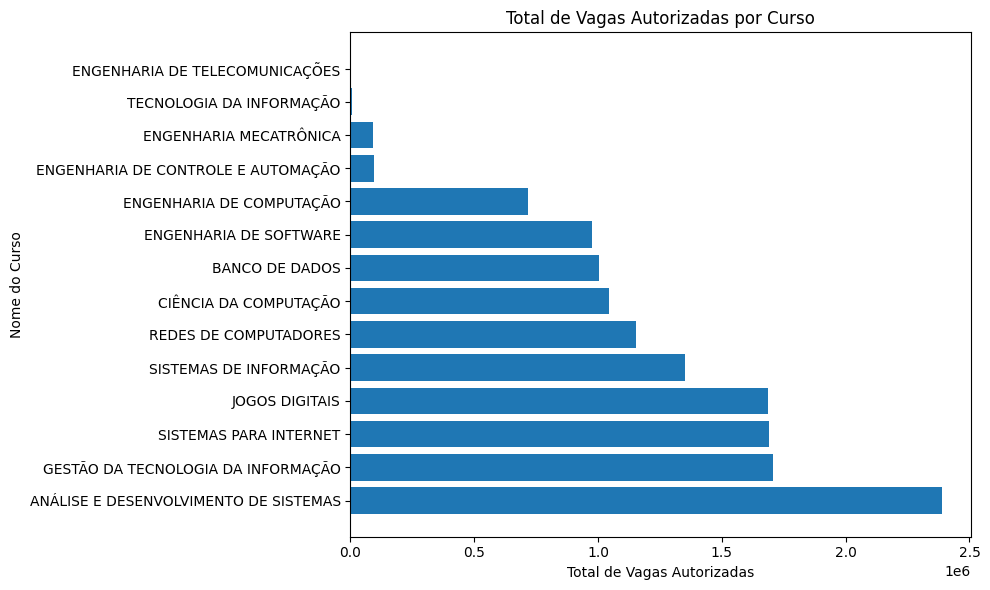

In [ ]:
vagas_por_curso = dfti_limpo_qtv.groupby('NOME_CURSO')['QT_VAGAS_AUTORIZADAS'].sum().reset_index()

vagas_por_curso_ordenadas = vagas_por_curso.sort_values(by='QT_VAGAS_AUTORIZADAS', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(vagas_por_curso_ordenadas['NOME_CURSO'], vagas_por_curso_ordenadas['QT_VAGAS_AUTORIZADAS'])
plt.xlabel('Total de Vagas Autorizadas')
plt.ylabel('Nome do Curso')
plt.title('Total de Vagas Autorizadas por Curso')
#plt.gca().invert_yaxis()  # Inverte o eixo y para que o curso com mais vagas fique no topo
plt.tight_layout()
plt.show()

Agora vamos analisar a distribuição de carga horária por curso.

In [ ]:
media_carga_horaria_cursos = dfti_limpo_ch.groupby('NOME_CURSO')['CARGA_HORARIA'].mean().reset_index().sort_values(by='CARGA_HORARIA', ascending=False)
media_carga_horaria_cursos

,NOME_CURSO,CARGA_HORARIA
7,ENGENHARIA MECATRÔNICA,3515.242331
4,ENGENHARIA DE CONTROLE E AUTOMAÇÃO,3506.775067
5,ENGENHARIA DE SOFTWARE,3449.149043
6,ENGENHARIA DE TELECOMUNICAÇÕES,3310.785827
2,CIÊNCIA DA COMPUTAÇÃO,3280.225047
11,SISTEMAS DE INFORMAÇÃO,3251.581470
3,ENGENHARIA DE COMPUTAÇÃO,3071.485447
13,TECNOLOGIA DA INFORMAÇÃO,2382.142857
0,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,2243.442617
9,JOGOS DIGITAIS,2233.059669


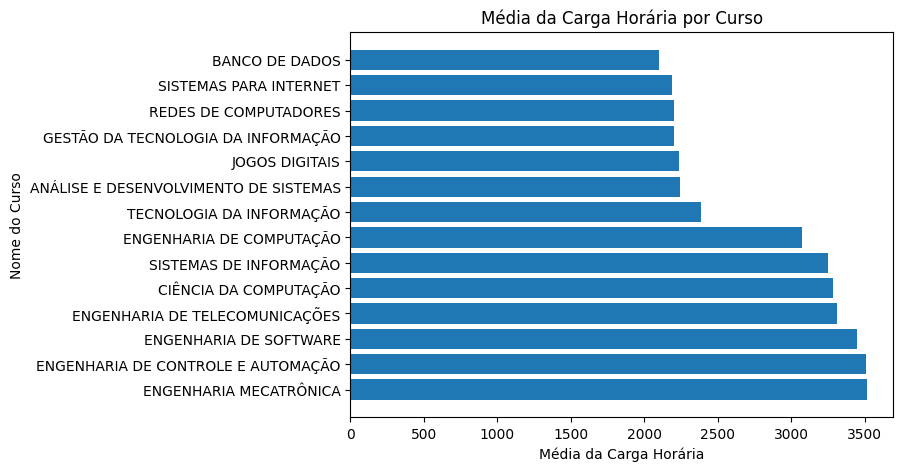

In [ ]:
plt.figure(figsize=(7, 5))
plt.barh(media_carga_horaria_cursos['NOME_CURSO'], media_carga_horaria_cursos['CARGA_HORARIA'])
plt.xlabel('Média da Carga Horária')
plt.ylabel('Nome do Curso')
plt.title('Média da Carga Horária por Curso')
plt.show()

# (Parte 2) Clusterização de cursos ou Classificação de Risco de Extinção

- Agrupar os cursos de graduação em clusters. Explorar se existem padrões comuns entre os cursos dentro de cada cluster e se é possível identificar grupos de cursos com características semelhantes.

- Classificar o grau de risco de um determinado curso ser extinto com base nos diversos atributos do dataset.
